# Comparaison des performances entre Vision Transformers (ViT) et Convolutional Neural Networks (CNN) pour la classification d’images

---

## Objectif principal
Comparer les performances de deux architectures pour la classification d’images :
- **Vision Transformers (ViT)** : Modèles basés sur l’attention, inspirés des transformers en NLP.
- **Convolutional Neural Networks (CNN)** : Modèles classiques utilisant des couches de convolution.

---

## Étapes clés du projet

### 1. Choix des jeux de données
- Sélectionner **au moins deux jeux de données étiquetés** pour la classification.
- **Motivation des choix** :
  - Variété des tailles (petits/grands datasets).
  - Complexité des images (ex. : objets simples vs. scènes naturelles).
  - Exemples possibles : CIFAR-10 (images simples), ImageNet (diversité élevée), ou des datasets spécialisés (médical, satellite).

### 2. Explication détaillée de l’architecture ViT
- **Principe** : Découper une image en *patches* (carreaux), traités comme des *tokens* (comme en NLP).
- **Composants clés** :
  - **Embedding des patches** : Transformation des patches en vecteurs via une couche linéaire.
  - **Positional Encoding** : Ajout d’informations spatiales (position des patches).
  - **Encoder** : Couches d’attention multi-têtes pour capturer les dépendances entre patches.
  - **Tête de classification** : Couche linéaire pour prédire la classe.

### 3. Sélection des architectures
- **ViT** : Exemples : ViT-Base, ViT-Large (selon la taille du dataset et les ressources).
- **CNN** : Exemples : ResNet-50, VGG-16, ou des modèles plus légers comme MobileNet.
- **Motivation** :
  - Équilibrer complexité et ressources disponibles.
  - Comparer des modèles "modernes" (ViT) vs. "classiques" (CNN).

### 4. Implémentation des modèles
- Utiliser **PyTorch** pour coder les architectures :
  - Pour les CNN : `Conv2d`, `MaxPool2d`, `Linear`.
  - Pour les ViT : Modules d’attention (`MultiheadAttention`), couches linéaires.
  - **Pas besoin de recoder** les mécanismes de base (attention, convolution).

### 5. Évaluation des performances
- **Métriques** : Précision (accuracy), perte (loss), temps d’entraînement/inférence, consommation mémoire.
- **Tableau comparatif** :

| Modèle       | Dataset 1 (Accuracy) | Dataset 2 (Accuracy) | Temps d’entraînement | Mémoire utilisée |
|--------------|----------------------|----------------------|----------------------|------------------|
| ViT-Base     | 92%                  | 88%                  | 10h                  | 12 Go            |
| ResNet-50    | 90%                  | 85%                  | 6h                   | 8 Go             |

### 6. Analyse des facteurs non liés à la performance
- **Dataset** : Les ViT nécessitent-ils plus de données que les CNN ?
- **Budget computationnel** : Coût en GPU/TPU pour l’entraînement.
- **Temps d’inférence** : Les ViT sont-ils plus lents à l’inférence ?
- **Interprétabilité** : Les CNN (via les *feature maps*) sont-ils plus interprétables que les ViT ?
- **Mémoire** : Empreinte mémoire des modèles (ex. : taille des poids).

### 7. Comparaison avec la littérature
- **Tendances actuelles** :
  - Les ViT surpassent souvent les CNN sur les **grands datasets** (ex. : ImageNet).
  - Les CNN restent compétitifs sur les **petits datasets** ou pour des tâches en temps réel.
  - **Hybrides** : Certains travaux combinent CNN et ViT (ex. : CNN comme *feature extractor* pour ViT).
- **Limites** :
  - Les ViT nécessitent des ressources importantes et des données massives.
  - Les CNN sont plus matures et optimisés pour le *edge computing*.

### 8. Bonus : Techniques d’explicabilité
- **Pour les CNN** :
  - **Grad-CAM** : Visualisation des zones importantes dans l’image.
  - **Feature Visualization** : Quelles caractéristiques activent les neurones ?
- **Pour les ViT** :
  - **Attention Maps** : Visualisation des patches les plus "attentifs".
  - **Attention Rollout** : Agrégation des couches d’attention pour interpréter les décisions.
- **Différences** :
  - Les CNN expliquent via des **régions spatiales** (ex. : contours, textures).
  - Les ViT expliquent via des **relations entre patches** (ex. : dépendances globales).

---

## Conclusion attendue
- **Quand choisir un ViT ?**
  - Si le dataset est **grand et varié**, et que les ressources sont suffisantes.
  - Pour des tâches nécessitant une **compréhension globale** de l’image.
- **Quand choisir un CNN ?**
  - Pour des **petits datasets** ou des contraintes de temps/mémoire.
  - Pour des applications **embarquées** ou en temps réel.
- **Perspectives** :
  - Les hybrides CNN-ViT pourraient dominer à l’avenir.
  - L’explicabilité reste un défi pour les ViT, mais des outils émergent.


## Choix des datasets

Nous allons prendre les datasets  MNIST, Fashion_MNIST, cifar10  car ils sont facilement importables depuis tensorflow.keras. On va utiliser [`Keras`](https://keras.io/) and [`Tensorflow`](https://www.tensorflow.org/) comme librairie pour pouvoir se baser sur les TPs existants déjà.

On pourrait prendre tiny cifarnet pcq les images ont des résolutions plus importantes, ca permettra de voir si les modèles sont performant sur des images plus "riches" et comparant les deux modèles dans des sitatuions différentes pcq tous les dataset sont un peu pareil non?

## Description des datasets utilisés

| Dataset         | Description                                                                                     | Taille des images | Nombre de classes | Exemples de classes                                                                                     |
|-----------------|-------------------------------------------------------------------------------------------------|-------------------|-------------------|---------------------------------------------------------------------------------------------------------|
| **MNIST**       | Dataset de chiffres manuscrits en niveaux de gris, souvent utilisé comme benchmark en vision.    | 28x28 pixels      | 10                | 0, 1, 2, 3, 4, 5, 6, 7, 8, 9                                                                           |
| **Fashion-MNIST** | Dataset d'articles de mode en niveaux de gris, conçu comme une alternative plus complexe à MNIST. | 28x28 pixels      | 10                | T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot                     |
| **CIFAR-10**    | Dataset d'images couleur d'objets divers, plus complexe et varié que MNIST.                     | 32x32 pixels      | 10                | Avion, Voiture, Oiseau, Chat, Cerf, Chien, Grenouille, Cheval, Bateau, Camion                           |

On a aussi choisi ces 3 datasets de façon à avoir 10 classes partout, ce qui est plus simple pour la suite.

ViT fort pour détecter rapidement un chat d'une maison et CNN pour voir des détails

In [1]:
# Utils
import os
import shutil
import time

# Maths - Stats
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import random as rd

# Data visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Deep Learning Librairies
#import tensorflow as tf
#from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.optimizers import Adam

# tf.config.list_physical_devices()
#[k.device_type for k in tf.config.list_physical_devices()]
# Nbre de classes communes pour les 3 datasets
N_classes=10


Importation des datasets avec Torch
DEmander si on doit respecter obligatoirement 80% train 10%val et 10% test (c'est pas le cas là)

In [37]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split
import os

#data set Abeille/Ant

TEST_SIZE = 0.2 
SEED = 42

base_path = os.getcwd() 
#data set Abeille/Ant
# Construit le chemin relatif vers les données
data_dir = os.path.join(base_path, 'data', 'hymenoptera_data')

# Utilisation
train_hym = datasets.ImageFolder(root=os.path.join(data_dir, 'train'))
test_hym = datasets.ImageFolder(root=os.path.join(data_dir, 'val'))

xtrain_hym, xval_hym = train_test_split(
    range(len(train_hym)),
    test_size=TEST_SIZE,
    random_state=SEED,
    stratify=full_train_ds.targets
)

y_test_hym = torch.tensor(test_hym.targets)
x_test_hym = [img for img, label in test_hym]

#Data set food101

data_dir2 = os.path.join(base_path, 'data', 'food-101')

full_food_ds = datasets.ImageFolder(root=os.path.join(data_dir2, 'images'))

train_food101, temp_idx = train_test_split(
    range(len(full_food_ds)),
    test_size=0.2,
    random_state=42,
    stratify=full_food_ds.targets
)

val_food101, test_food101 = train_test_split(
    temp_idx,
    test_size=0.5, 
    random_state=42,
    stratify=[full_food_ds.targets[i] for i in temp_idx]
)

#Cifar

ds_cifar_train = datasets.CIFAR10(root="data", train=True, download=True)
ds_cifar_test = datasets.CIFAR10(root="data", train=False, download=True)

cifar_targets = torch.tensor(ds_cifar_train.targets)

x_train_cifar10, x_val_cifar10, y_train_cifar10, y_val_cifar10 = train_test_split(
    ds_cifar_train.data,
    cifar_targets,  # On passe la version tensorisée pour être sûr
    test_size=TEST_SIZE,
    random_state=SEED,
    stratify=cifar_targets
)

x_test_cifar10= torch.tensor(ds_cifar_test.data)
y_test_cifar10 = torch.tensor(ds_cifar_test.targets)

# --- Affichage des tailles pour Hymenoptera ---
print("--- DATASET: HYMENOPTERA (Abeilles/Fourmis) ---")
print(f"Entraînement (Train) : {len(xtrain_hym)}")
print(f"Validation           : {len(xval_hym)}")
print(f"Test                 : {len(x_test_hym)}")
print("-" * 40)

# --- Affichage des tailles pour Food101 ---
print("--- DATASET: FOOD101 ---")
print(f"Entraînement (Train) : {len(train_idx)}")
print(f"Validation           : {len(val_idx)}")
# Note : Pour x_test_hym de food101 dans votre code, on utilise test_food101
print(f"Test                 : {len(test_food101)}") 
print("-" * 40)

# --- Affichage des tailles pour CIFAR-10 ---
print("--- DATASET: CIFAR-10 ---")
print(f"Entraînement (Train) : {len(x_train_cifar10)}")
print(f"Validation           : {len(x_val_cifar10)}")
print(f"Test                 : {len(x_test_cifar10)}")
print("-" * 40)

--- DATASET: HYMENOPTERA (Abeilles/Fourmis) ---
Entraînement (Train) : 195
Validation           : 49
Test                 : 153
----------------------------------------
--- DATASET: FOOD101 ---
Entraînement (Train) : 80800
Validation           : 10100
Test                 : 10100
----------------------------------------
--- DATASET: CIFAR-10 ---
Entraînement (Train) : 40000
Validation           : 10000
Test                 : 10000
----------------------------------------


# Visualisation des datasets

In [2]:
def describe_image_dataset(x_train, y_train, x_test, y_test, class_names=None, cmap="gray"):
    """
    Describe an image classification dataset using common statistics and visualizations.

    Parameters
    ----------
    x_train : np.ndarray
        Training images.
    y_train : np.ndarray
        Training labels.
    x_test : np.ndarray
        Test images.
    y_test : np.ndarray
        Test labels.
    class_names : list or None
        Optional list of class names. If None, classes are displayed as integers.
    cmap : str
        Matplotlib colormap for image display.
    """

    # --- Basic dataset information ---
    # Extract dataset shape (assume (N, H, W, ...) format)
    N_train = x_train.shape[0]
    N_test = x_test.shape[0]

    # Handle grayscale vs RGB images
    if x_train.ndim == 3:
        H, W = x_train.shape[1], x_train.shape[2]
        C = 1
    elif x_train.ndim == 4:
        H, W, C = x_train.shape[1], x_train.shape[2], x_train.shape[3]
    else:
        raise ValueError("Images must be shaped (N,H,W) or (N,H,W,C).")

    # Number of classes
    classes = np.unique(y_train)
    N_classes = len(classes)

    print("----- Dataset Description -----")
    print(f"Train data: {N_train} images ({H} × {W} pixels, {C} channels)")
    print(f"Test data : {N_test} images ({H} × {W} pixels, {C} channels)")
    print(f"Number of classes: {N_classes}")
    print("--------------------------------")


    # --- Distribution histograms (matplotlib) ---
    plt.figure()
    plt.hist(y_train, density=True, alpha=0.6, label='train set')
    plt.hist(y_test, density=True, alpha=0.4, label='test set')
    plt.title("Distribution in test and train sets")
    plt.legend()
    plt.show()


    # --- Distribution histograms (seaborn) ---
    plt.figure()
    sns.histplot(y_train, stat='proportion', discrete=True, alpha=.8, shrink=.8, label='Train set')
    sns.histplot(y_test, stat='proportion', discrete=True, alpha=.5, shrink=.8, label='Test set')

    plt.title("Number distribution in test and train sets")
    plt.legend()
    plt.show()


    # --- Display example images by class ---
    fig = plt.figure(figsize=(10, 5))

    for i in range(N_classes):
        ax = fig.add_subplot(2, (N_classes+1)//2, i+1)

        # Random sample from class i
        sample_index = rd.choice(np.where(y_train == i)[0])
        img = x_train[sample_index]

        # Remove channel dimension if needed
        if C == 1 and img.ndim == 3:
            img = img.squeeze()

        ax.imshow(img, cmap=cmap if C == 1 else None)

        label_name = class_names[i] if class_names else i
        ax.set_title(f"Class: {label_name}\nIdx: {sample_index}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

## MNIST


----- Dataset Description -----
Train data: 60000 images (28 × 28 pixels, 1 channels)
Test data : 10000 images (28 × 28 pixels, 1 channels)
Number of classes: 10
--------------------------------


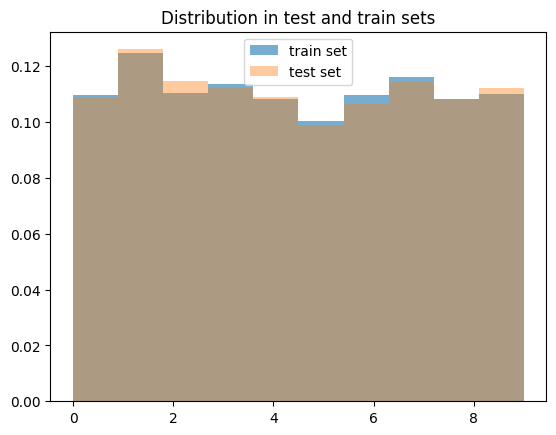

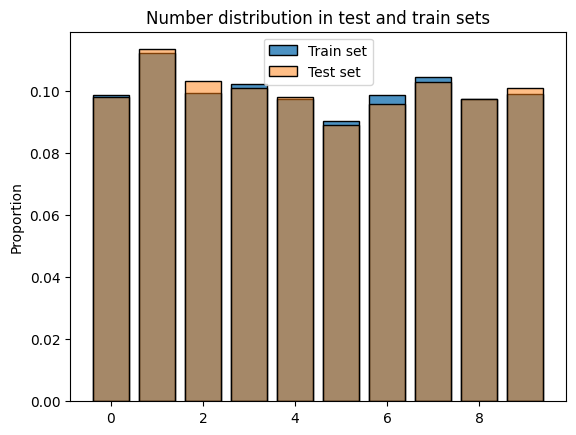

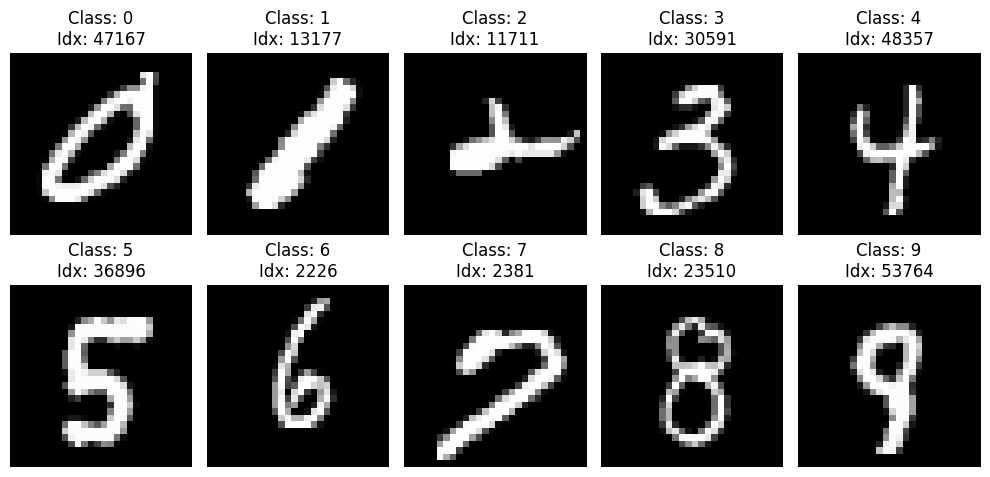

In [ ]:
describe_image_dataset(
    x_train_mnist, y_train_mnist,
    x_test_mnist, y_test_mnist,
    class_names=[str(i) for i in range(10)],
    cmap="gray"
)

## Fashio_MNIST

----- Dataset Description -----
Train data: 60000 images (28 × 28 pixels, 1 channels)
Test data : 10000 images (28 × 28 pixels, 1 channels)
Number of classes: 10
--------------------------------


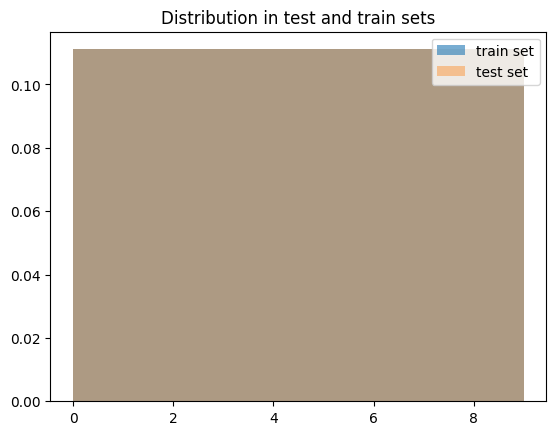

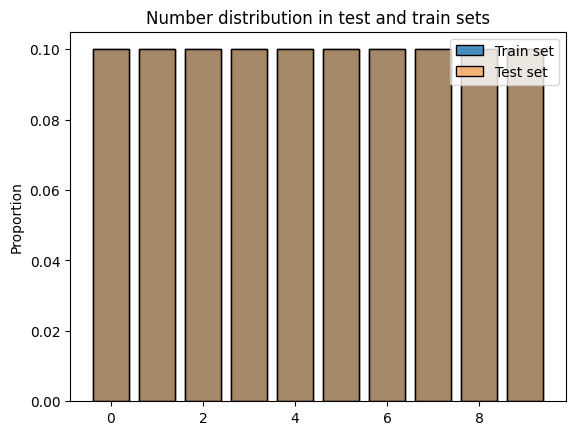

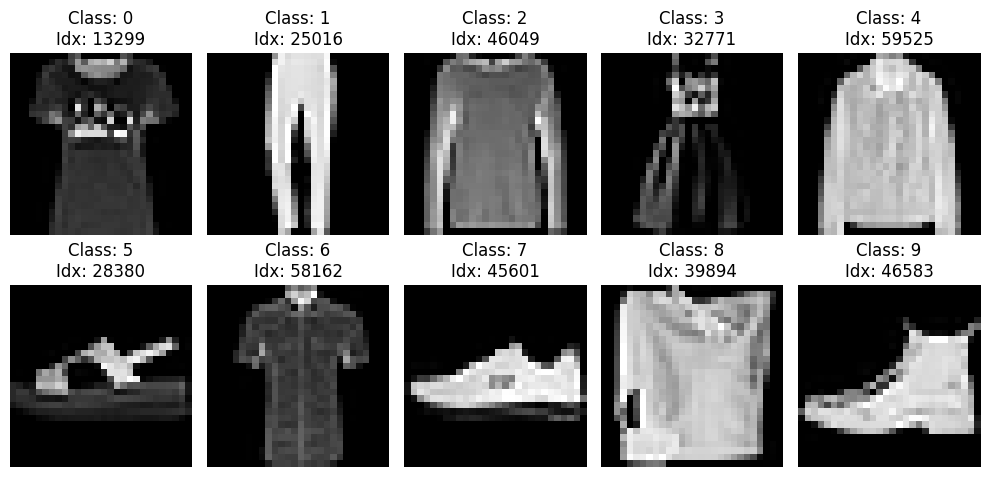

In [ ]:
describe_image_dataset(
    x_train_Fmnist, y_train_Fmnist,
    x_test_Fmnist, y_test_Fmnist,
    class_names=[str(i) for i in range(10)],
    cmap="gray"
)

## Cifar10

----- Dataset Description -----
Train data: 50000 images (32 × 32 pixels, 3 channels)
Test data : 10000 images (32 × 32 pixels, 3 channels)
Number of classes: 10
--------------------------------


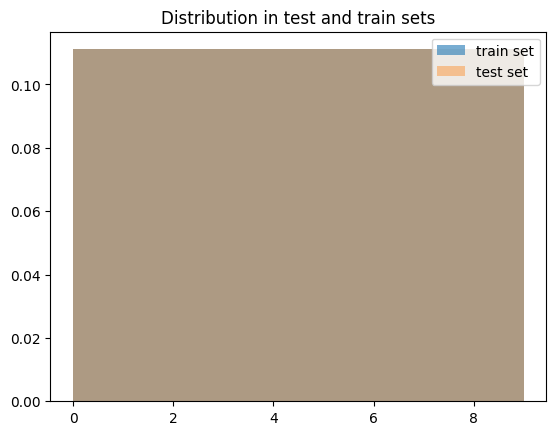

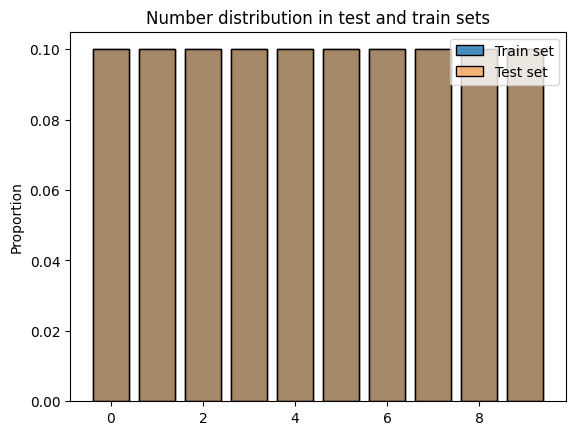

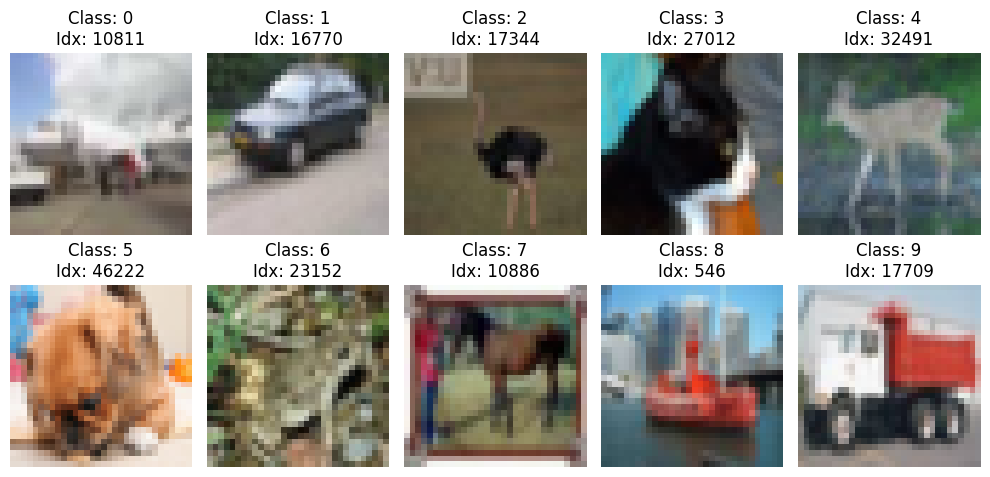

In [ ]:
describe_image_dataset(
    x_train_cifar10, y_train_cifar10,
    x_test_Fmnist, y_test_Fmnist,
    class_names=[str(i) for i in range(10)],
    cmap="gray"
)

# Convolutional Neural Network (CNN or ConvNet)

On va commencer par la classification pa CNN

### Data format

L'architecture de convolution prend en entrée des **images** et non des vecteurs 1D. Cependant, un certain formatage des données reste nécessaire.

Une **troisième dimension** est requise : la dimension des **canaux** (ou *channels*), qui permet de décrire chaque pixel.
- Dans notre cas, cette dimension a une taille de **1**, car les images sont en niveaux de gris (ex. : MNIST, Fashion-MNIST).
- Pour les images en couleur (comme CIFAR-10), chaque pixel est codé par **plusieurs valeurs** (généralement 3 valeurs pour les canaux **RGB** : Rouge, Vert, Bleu).

Ainsi, il est nécessaire de **redimensionner** les images :
- Pour MNIST/Fashion-MNIST : passer d'une dimension **$28 \times 28$** à **$28 \times 28 \times 1$**.
- Pour CIFAR-10 : passer d'une dimension **$32 \times 32$** à **$32 \times 32 \times 3$** (pour inclure les 3 canaux RGB)

Est-ce qu'on pourrait pas prendre un modèle facilement explicable comme VGG 16 pour le CNN? ca pourrait etre un choix pour le modèle?
Je pense que c'est intéressant de prendre un ViT et CNN de base puis on ajoute une architecture, pour les CNN soit VGG16 ou Resnet (Resnet étant le plus récent) et ViT on peut prendre le DataEFficient pcq on aura pas les meilleures puissances avec nos ordi et ceux du GMM. Dans tous les cas, les modèles plus complexes vont pouvoir etre finetunés ca prendre pas tant de temps que ça?

In [ ]:
def convert_images(x, grayscale=True):
    """
    Convert dataset images into the correct CNN format using np.expand_dims.

    Parameters
    ----------
    x : np.ndarray
        Input image array with shape (N, H, W) or (N, H, W, C).
    grayscale : bool
        If True: ensure output is (N, H, W, 1)
        If False: keep original channels (RGB case).

    Returns
    -------
    np.ndarray
        Converted array ready for CNN input.
    """

    # Case: images already have a channel dimension
    if x.ndim == 4:
        # If grayscale requested but images already have RGB channels, keep as is
        # because expand_dims is not needed.
        return x

    # Case: images shaped (N, H, W), typical of MNIST/F-MNIST
    if x.ndim == 3:
        if grayscale:
            # Add channel dimension: (N, H, W, 1)
            return np.expand_dims(x, axis=-1)
        else:
            # No channel added (not expected for MNIST, but supported)
            return x

    raise ValueError("Input array must have shape (N,H,W) or (N,H,W,C).")

## For MNIST dataset
x_train_conv_mnist = convert_images(x_train_mnist, grayscale=True)
x_test_conv_mnist  = convert_images(x_test_mnist, grayscale=True)

print("Train data:", x_train_conv_mnist.shape)
print("Test data :", x_test_conv_mnist.shape)

## For FashionMNIST dataset
x_train_conv_Fmnist = convert_images(x_train_Fmnist, grayscale=True)
x_test_conv_Fmnist  = convert_images(x_test_Fmnist, grayscale=True)

print("Train data:", x_train_conv_Fmnist.shape)
print("Test data :", x_test_conv_Fmnist.shape)

## For Cifar10 dataset
x_train_conv_cifar10 = convert_images(x_train_cifar10, grayscale=False)
x_test_conv_cifar10  = convert_images(x_test_cifar10, grayscale=False)

print("Train data:", x_train_conv_cifar10.shape)
print("Test data :", x_test_conv_cifar10.shape)

Train data: (60000, 28, 28, 1)
Test data : (10000, 28, 28, 1)
Train data: (60000, 28, 28, 1)
Test data : (10000, 28, 28, 1)
Train data: torch.Size([50000, 32, 32, 3])
Test data : torch.Size([10000, 32, 32, 3])


### Architecture pour des images gray scale

On commence directement avec la dernière architecture qu'on a introduit dans le TP MNIST (on test pour le moment une architecture pour le gray scale et une autre pour des images de couleurs).  

Nous allons maintenant concevoir une architecture plus complexe pour essayer d'améliorer les résultats de la classification :
- Une couche **`Conv2D`** avec **32 filtres de taille $3 \times 3$** et la fonction d'activation **`ReLU`**,
- Une couche **`Conv2D`** avec **64 filtres de taille $3 \times 3$** et la fonction d'activation **`ReLU`**,
- Une couche **`MaxPooling`** avec une fenêtre de taille **$2 \times 2$**,
- Une couche **`Dropout`** avec un taux d'abandon de **25 %**,
- Une couche **`Flatten`**,
- Une couche **`Dense`** avec **128 neurones** et la fonction d'activation **`ReLU`**,
- Une couche **`Dropout`** avec un taux d'abandon de **50 %**,
- Une couche **`Dense`** avec **10 neurones** et la fonction d'activation **`softmax`**.


In [ ]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPool2D, MaxPooling2D
from sklearn.metrics import confusion_matrix

ModelCNN_1 est pour MNIST et ModelCNN_2 est pour FashioMNIST.

In [ ]:
ModelCNN_1 = Sequential()
ModelCNN_1.add(Input(shape=(28, 28, 1)))
ModelCNN_1.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation='relu'))
ModelCNN_1.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, activation='relu'))
ModelCNN_1.add(MaxPool2D(pool_size=(2, 2)))
ModelCNN_1.add(Dropout(0.25))
ModelCNN_1.add(Flatten())
ModelCNN_1.add(Dense(units=128, activation='relu'))
ModelCNN_1.add(Dropout(0.5))
ModelCNN_1.add(Dense(units=N_classes, activation='softmax'))
ModelCNN_1.summary()

# Configuration du réseau
ModelCNN_1.compile(loss="sparse_categorical_crossentropy",
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ModelCNN_2 = Sequential()
ModelCNN_2.add(Input(shape=(28, 28, 1)))
ModelCNN_2.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation='relu'))
ModelCNN_2.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, activation='relu'))
ModelCNN_2.add(MaxPool2D(pool_size=(2, 2)))
ModelCNN_2.add(Dropout(0.25))
ModelCNN_2.add(Flatten())
ModelCNN_2.add(Dense(units=128, activation='relu'))
ModelCNN_2.add(Dropout(0.5))
ModelCNN_2.add(Dense(units=N_classes, activation='softmax'))
ModelCNN_2.summary()

# Configuration du réseau
ModelCNN_2.compile(loss="sparse_categorical_crossentropy",
              optimizer=Adam(),
              metrics=['accuracy'])


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

## Entrainement pour MNIST et FashionMNIST

In [ ]:
# Network training
batch_size=128
epochs=10

t_train_ModelCNN_1 = time.time()
history_1=ModelCNN_1.fit(x_train_conv_mnist, y_train_mnist,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (x_test_conv_mnist, y_test_mnist))
t_train_ModelComplex= time.time() - t_train_ModelCNN_1

NameError: name 'ModelCNN_1' is not defined

In [ ]:
# Network training
batch_size=128
epochs=10

t_train_ModelCNN_2 = time.time()
history_2=ModelCNN_2.fit(x_train_conv_Fmnist, y_train_Fmnist,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (x_test_conv_Fmnist, y_test_Fmnist))
t_train_ModelComplex= time.time() - t_train_ModelCNN_2

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7707 - loss: 1.1215 - val_accuracy: 0.8604 - val_loss: 0.3749
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8525 - loss: 0.4157 - val_accuracy: 0.8730 - val_loss: 0.3467
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8672 - loss: 0.3621 - val_accuracy: 0.8815 - val_loss: 0.3102
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8782 - loss: 0.3300 - val_accuracy: 0.8954 - val_loss: 0.2906
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8892 - loss: 0.3032 - val_accuracy: 0.8942 - val_loss: 0.2908
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8928 - loss: 0.2859 - val_accuracy: 0.9001 - val_loss: 0.2757
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9014 - loss: 0.2669 - val_accuracy: 0.9025 - val_loss: 0.2836
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9047 - loss: 0.2555 - val_accuracy: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test loss: 0.04291757196187973
Test accuracy: 0.9873999953269958
Temps d'exécution : 1764516573.68 secondes


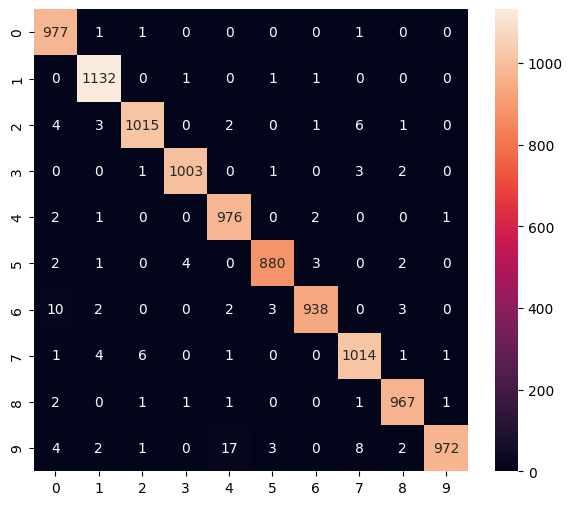

In [ ]:
score_ModelCNN_1 = ModelCNN_1.evaluate(x_test_conv_mnist, y_test_mnist, verbose=0)
predict_ModelCNN_1 = ModelCNN_1.predict(x_test_conv_mnist)

print('Test loss:', score_ModelCNN_1[0])
print('Test accuracy:', score_ModelCNN_1[1])
print("Temps d'exécution : %.2f secondes" % t_train_ModelCNN_1)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.heatmap(
    pd.DataFrame(confusion_matrix(y_test_mnist, predict_ModelCNN_1.argmax(1))),
    annot=True,
    fmt="d"
)


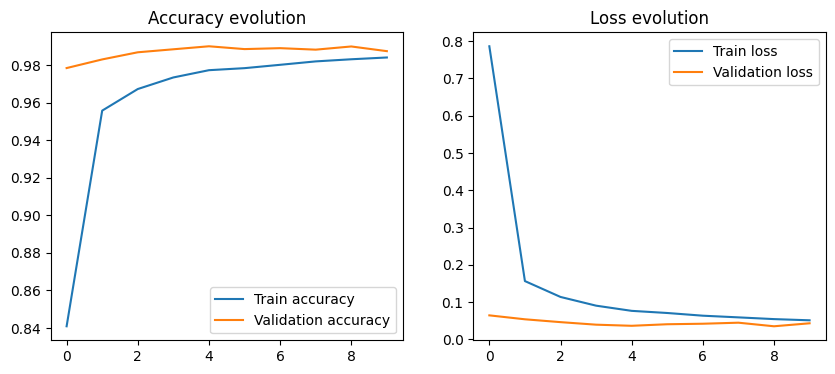

In [ ]:
# --- Plot training accuracy ---
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history_1.history['accuracy'], label='Train accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation accuracy')
plt.title("Accuracy evolution")
plt.legend()

# --- Plot training loss ---
plt.subplot(1,2,2)
plt.plot(history_1.history['loss'], label='Train loss')
plt.plot(history_1.history['val_loss'], label='Validation loss')
plt.title("Loss evolution")
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test loss: 0.26099085807800293
Test accuracy: 0.9085999727249146
Temps d'exécution : 1764516603.35 secondes


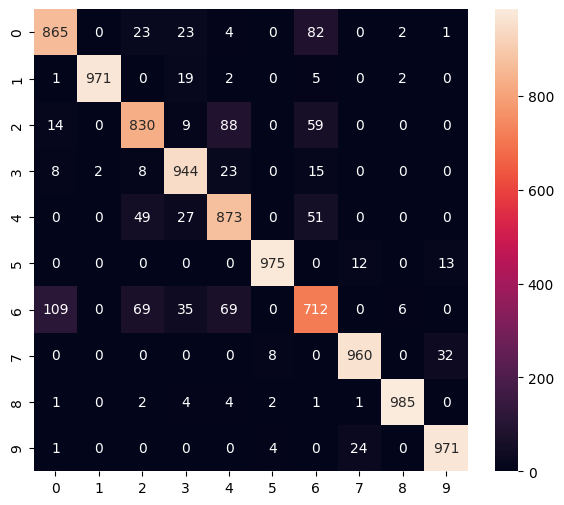

In [ ]:
score_ModelCNN_2 = ModelCNN_2.evaluate(x_test_conv_Fmnist, y_test_Fmnist, verbose=0)
predict_ModelCNN_2 = ModelCNN_2.predict(x_test_conv_Fmnist)

print('Test loss:', score_ModelCNN_2[0])
print('Test accuracy:', score_ModelCNN_2[1])
print("Temps d'exécution : %.2f secondes" % t_train_ModelCNN_2)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.heatmap(
    pd.DataFrame(confusion_matrix(y_test_Fmnist, predict_ModelCNN_2.argmax(1))),
    annot=True,
    fmt="d"
)


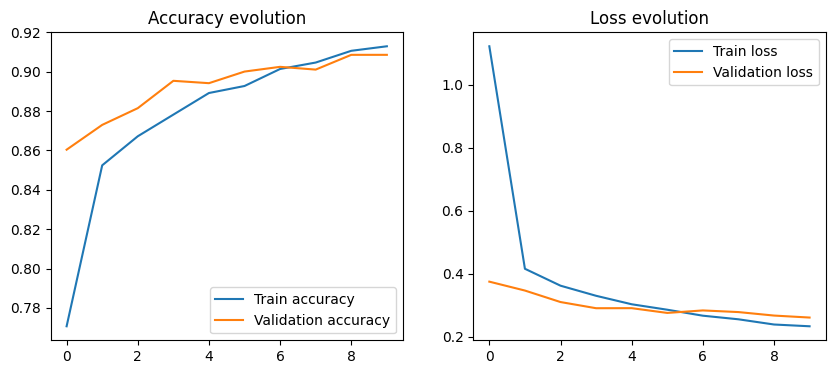

In [ ]:
# --- Plot training accuracy ---
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history_2.history['accuracy'], label='Train accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation accuracy')
plt.title("Accuracy evolution")
plt.legend()

# --- Plot training loss ---
plt.subplot(1,2,2)
plt.plot(history_2.history['loss'], label='Train loss')
plt.plot(history_2.history['val_loss'], label='Validation loss')
plt.title("Loss evolution")
plt.legend()

plt.show()

On peut tester la classification des deux réseaux sur l'autre dataset. On s'attend de façon évidente à ce que la précision soit très faible.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step
Test loss: 5.285816192626953
Test accuracy: 0.08079999685287476
Temps d'exécution : 1764516573.68 secondes


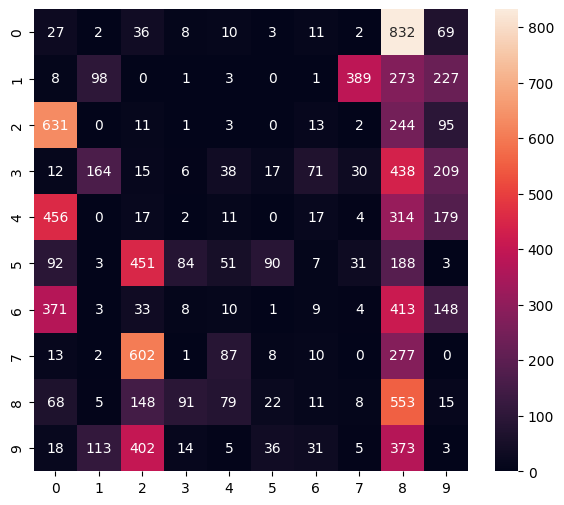

In [ ]:
score_ModelCNN_1 = ModelCNN_1.evaluate(x_test_conv_Fmnist, y_test_Fmnist, verbose=0)
predict_ModelCNN_1 = ModelCNN_1.predict(x_test_conv_Fmnist)

print('Test loss:', score_ModelCNN_1[0])
print('Test accuracy:', score_ModelCNN_1[1])
print("Temps d'exécution : %.2f secondes" % t_train_ModelCNN_1)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.heatmap(
    pd.DataFrame(confusion_matrix(y_test_Fmnist, predict_ModelCNN_1.argmax(1))),
    annot=True,
    fmt="d"
)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step
Test loss: 13.100054740905762
Test accuracy: 0.1128000020980835
Temps d'exécution : 1764516603.35 secondes


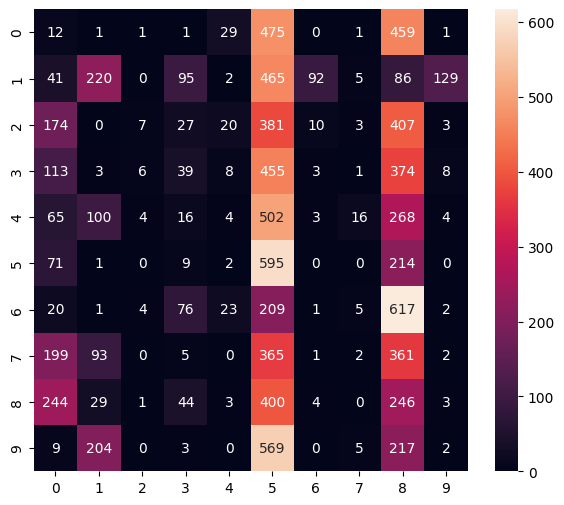

In [ ]:
score_ModelCNN_2 = ModelCNN_2.evaluate(x_test_conv_mnist, y_test_mnist, verbose=0)
predict_ModelCNN_2 = ModelCNN_2.predict(x_test_conv_mnist)

print('Test loss:', score_ModelCNN_2[0])
print('Test accuracy:', score_ModelCNN_2[1])
print("Temps d'exécution : %.2f secondes" % t_train_ModelCNN_2)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.heatmap(
    pd.DataFrame(confusion_matrix(y_test_mnist, predict_ModelCNN_2.argmax(1))),
    annot=True,
    fmt="d"
)


## Achitecture pour des images de couleurs



On va améliorer la précédente achitecture et adapter les entrées et sorties pour avoir 3 canaux RGB. On propose les améliorations suivantes :
---

### 1. **Augmentation de la profondeur du réseau**
- **Ajout de blocs de convolution supplémentaires** :
  - Passage de 2 à 6 couches `Conv2D` organisées en 3 blocs (32 → 64 → 128 filtres).
  - Chaque bloc est suivi d'une couche `MaxPooling2D` pour réduire la dimension spatiale.
- **Objectif** : Capturer des caractéristiques plus complexes et hiérarchiques (bords → textures → motifs).

---

### 2. **Normalisation par lots (`BatchNormalization`)**
- **Ajout après chaque couche `Conv2D`** :
  - Stabilise et accélère l'apprentissage en normalisant les activations.
  - Réduit la sensibilité à l'initialisation des poids.
- **Avantage** : Permet d'utiliser des taux d'apprentissage plus élevés et réduit le risque de surapprentissage.

---

### 3. **Augmentation progressive des filtres**
- **Structure pyramidale** :
  - Bloc 1 : 32 filtres (caractéristiques basiques).
  - Bloc 2 : 64 filtres (motifs intermédiaires).
  - Bloc 3 : 128 filtres (motifs complexes).
- **Pourquoi ?** : Adapte la capacité du modèle à la complexité croissante des caractéristiques.

---

### 4. **Renforcement de la partie entièrement connectée**
- **Ajout d'une couche `Dense` supplémentaire** :
  - Passage de 1 à 2 couches cachées (256 → 128 neurones).
  - Couche de `Dropout(0.5)` entre les deux pour régulariser.
- **Bénéfice** : Meilleure capacité de classification sans surapprentissage.

---

### 5. **Optimiseur `Adam` avec taux d'apprentissage adapté**
- **Remplacement de `Adadelta` par `Adam(learning_rate=0.001)`** :
  - Convergence plus rapide et plus stable.
  - Compatible avec `BatchNormalization`.


In [ ]:
from tensorflow.keras.layers import BatchNormalization

ModelCNN_RGB = Sequential()
ModelCNN_RGB.add(Input(shape=(32, 32, 3)))

# Bloc 1
ModelCNN_RGB.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
ModelCNN_RGB.add(BatchNormalization())
ModelCNN_RGB.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
ModelCNN_RGB.add(BatchNormalization())
ModelCNN_RGB.add(MaxPool2D(pool_size=(2, 2)))

# Bloc 2
ModelCNN_RGB.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
ModelCNN_RGB.add(BatchNormalization())
ModelCNN_RGB.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
ModelCNN_RGB.add(BatchNormalization())
ModelCNN_RGB.add(MaxPool2D(pool_size=(2, 2)))

# Bloc 3
ModelCNN_RGB.add(Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
ModelCNN_RGB.add(BatchNormalization())
ModelCNN_RGB.add(Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
ModelCNN_RGB.add(BatchNormalization())
ModelCNN_RGB.add(MaxPool2D(pool_size=(2, 2)))

ModelCNN_RGB.add(Dropout(0.25))

# Partie entièrement connectée
ModelCNN_RGB.add(Flatten())
ModelCNN_RGB.add(Dense(units=256, activation='relu'))
ModelCNN_RGB.add(Dropout(0.5))
ModelCNN_RGB.add(Dense(units=128, activation='relu'))
ModelCNN_RGB.add(Dropout(0.5))
ModelCNN_RGB.add(Dense(units=N_classes, activation='softmax'))

ModelCNN_RGB.summary()

# Compilation
ModelCNN_RGB.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,29

 Total params: 847,530 (3.23 MB)

 Trainable params: 846,634 (3.23 MB)

 Non-trainable params: 896 (3.50 KB)

Pour l'entrainement on garde la même taille de batch mais on va prendre 20 epochs pour permettre au modèle de s'entrainer plus longtemps.

In [ ]:
# --- Compile the RGB CNN model ---
epochs=10
batch_size=128
# --- Train the model on CIFAR-10 ---
history = ModelCNN_RGB.fit(
    x_train_conv_cifar10,
    y_train_cifar10,
    validation_data=(x_test_conv_cifar10, y_test_cifar10),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)


Epoch 1/10


2025-11-30 16:40:45.842419: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-30 16:40:45.842533: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-30 16:40:46.769385: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3641', 64 bytes spill stores, 64 bytes spill loads

2025-11-30 16:40:46.980869: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning :

390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2446 - loss: 2.2321

2025-11-30 16:40:56.389197: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-30 16:40:56.389311: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-30 16:40:57.632882: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2203', 11756 bytes spill stores, 11088 bytes spill loads



391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2448 - loss: 2.2312

2025-11-30 16:41:03.448234: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_241', 8 bytes spill stores, 8 bytes spill loads

2025-11-30 16:41:03.555383: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_241', 8 bytes spill stores, 8 bytes spill loads



391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.3160 - loss: 1.8971 - val_accuracy: 0.4419 - val_loss: 1.6277
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5176 - loss: 1.3698 - val_accuracy: 0.6148 - val_loss: 1.1417
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6157 - loss: 1.1199 - val_accuracy: 0.6181 - val_loss: 1.1532
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6781 - loss: 0.9539 - val_accuracy: 0.6990 - val_loss: 0.9062
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7190 - loss: 0.8426 - val_accuracy: 0.7179 - val_loss: 0.8412
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7493 - loss: 0.7629 - val_accuracy: 0.7071 - val_loss: 0.8567
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7781 - loss: 0.6744 - val_accuracy: 0.7594 - val_loss: 0.7272
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7913 - loss: 0.6283 - val_accuracy: 0.77

2025-11-30 16:41:42.722262: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-30 16:41:43.205718: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_234', 56 bytes spill stores, 56 bytes spill loads

2025-11-30 16:41:43.307639: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_241', 8 bytes spill stores, 8 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Test loss: 0.6838312745094299
Test accuracy: 0.7763000130653381
Execution time: 2.36 seconds


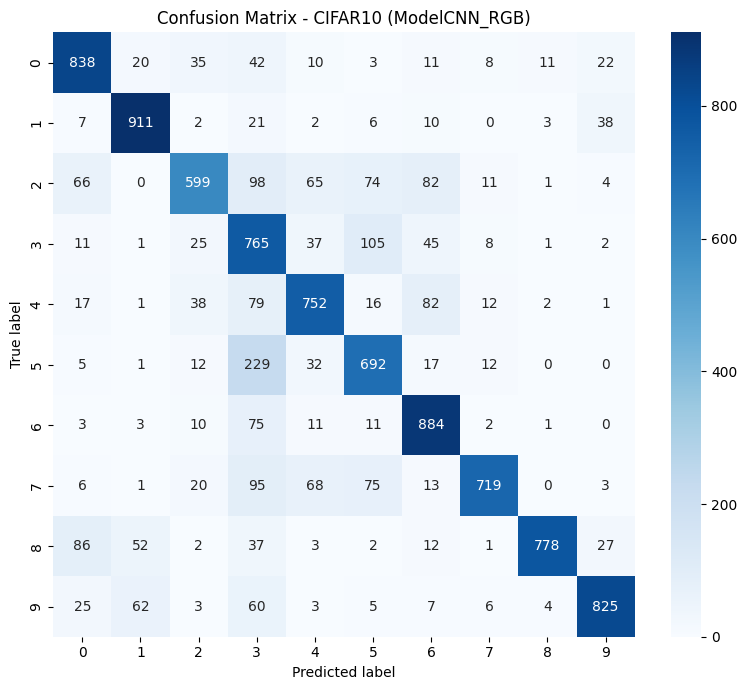

In [ ]:
# --- Evaluate the model ---
t0 = time.time()
score_ModelCNN_RGB = ModelCNN_RGB.evaluate(x_test_conv_cifar10, y_test_cifar10, verbose=0)
t_train_ModelCNN_RGB = time.time() - t0

# --- Predictions ---
predict_ModelCNN_RGB = ModelCNN_RGB.predict(x_test_conv_cifar10)

# --- Print performance ---
print('Test loss:', score_ModelCNN_RGB[0])
print('Test accuracy:', score_ModelCNN_RGB[1])
print("Execution time: %.2f seconds" % t_train_ModelCNN_RGB)

# --- Confusion matrix ---
cm = confusion_matrix(y_test_cifar10, predict_ModelCNN_RGB.argmax(1))

# --- Display confusion matrix ---
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(1, 1, 1)

ax = sns.heatmap(
    pd.DataFrame(cm),
    annot=True,
    fmt="d",
    cmap="Blues"
)

plt.title("Confusion Matrix - CIFAR10 (ModelCNN_RGB)")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

Test accuracy: 0.7763
Test loss: 0.6838


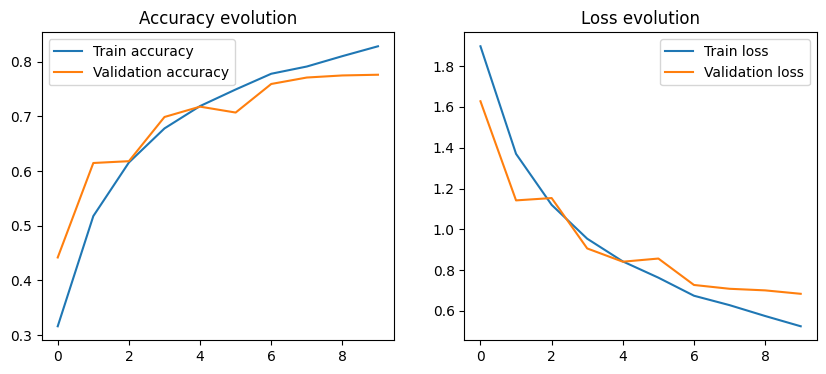

In [ ]:
# --- Evaluate on the test set ---
test_loss, test_acc = ModelCNN_RGB.evaluate(x_test_conv_cifar10, y_test_cifar10, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# --- Plot training accuracy ---
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title("Accuracy evolution")
plt.legend()

# --- Plot training loss ---
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("Loss evolution")
plt.legend()

plt.show()

# Modèle ViT

Commençons par entrainer un modèle ViT

## Explication du modèle


IL faut expliquer en détail ce qu'on a pas vu en TP ou en cours du style si on utilise une autre couche linear,un batch patch,... mettre une illustration ca sera plus simple à comprendre.

ViT Compréhension :

Un ViT est un Transformer qui utilise une architecture Encoder-Only pour une tache de classification.

1ère partie : Préparation de la donnée

- L'image est découpée en patches (petits carrés).

- Chaque patch contient les valeurs des pixels (ex: pour du RGB 16x16, on a 16 x16 x 3 valeurs).

- On aplatit (flatten) ces matrices pour obtenir un seul long vecteur  par patch.

2ème partie : Linear Projection (Embeddings)

- Chaque vecteur passe dans une couche linéaire (projection) pour être transformé en un vecteur d'embedding d'une dimension fixe ($h_{dim}$, ex: 768).

3ème partie : Token CLS :
Le modèle ajoute un vecteur appelé Token CLS qui servira à retenir l'information globale, soit le modèle ajoute un vecteur au début de la séquence.
4ème partie: Positional Embbedings
La position spatiale des patches n'est pas retenue par le transformer, le modèle introduit des positional encodings pour retnir la structure spatiale le l'image originale. Pour faire cela, il utilise des positonal encodings, le token CLS prend la position 0:

- Il ajoute à chaque vecteur (patches + CLS) un Positional Encoding pour que le modèle connaisse la position spatiale de chaque morceau
- Ces positionals encodings peuvent etre fixé ou apprenable par le modèle (en fonction de l'architecture), donc dans certain cas ils seront des paramètres apprenables par le modèle.

Partie Boucle (Encoder Block) :

On prend en entrée les patchs embeddings + les positonal embeddings.

4ème partie : Layer Norm & Multi-Head Attention (MHA)

Au lieu de prendre un vecteur, on prend la Matrice d'entrée X (qui contient tous les patchs + le token CLS).

    Normalisation (Pre-Norm) : On applique d'abord une Layer Normalization sur la matrice X avant qu'elle n'entre dans l'attention.

    Projections : On multiplie cette matrice normalisée par les matrices de poids WQ,WK,WV pour créer les matrices Query, Key et Value.

    Attention (Têtes) :

        On divise en H têtes.

        On calcule Softmax(QK^T / scale) * V (tout cela se fait par multiplication matricielle, traitant tous les patchs en parallèle).

    Projection finale : On concatène les têtes et on multiplie par WO.

5ème partie : Connexion Résiduelle (Add)

Ici, on fait seulement l'addition, pas de normalisation (car on l'a faite au début de l'étape 4).

    On additionne la matrice originale X (celle qui n'avait pas été touchée) avec le résultat qui sort du MHA.

    Formule : Z=X+MHA(LN(X))

    Note : Cette connexion directe ("skip connection") permet au gradient de circuler facilement pendant l'apprentissage.

6ème partie : Layer Norm & Feed Forward (FFN/MLP)

On repart de la matrice Z obtenue à l'étape précédente.

    Normalisation (Pre-Norm) : On applique une Layer Normalization sur Z avant le MLP.

    MLP : On passe cette matrice normalisée dans le réseau de neurones dense (généralement deux couches linéaires séparées par une activation GELU).

        Ce réseau traite chaque patch individuellement mais avec les mêmes poids pour tous.

7ème partie : Connexion Résiduelle (Add)

    On ajoute l'entrée du bloc (Z) avec la sortie du MLP.

    Formule finale du bloc : Y=Z+MLP(LN(Z))

Sortie Finale :

On applique une Layer Normalization finale sur la sortie du dernier bloc.

On extrait uniquement le vecteur correspondant au Token CLS (le 1er vecteur de la séquence).

On le passe dans une Linear Head (couche dense) pour le projeter vers le nombre de classes (Logits).

On applique un Softmax pour obtenir les probabilités finales (ex: Chat 90%, Chien 10%).

## Déclaration de la classe ViT

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

In [39]:
#Classes nécessaire

#Embeddings


class PatchEmbedding(nn.Module):

    def __init__(self, img_size=224, patch_size=16, in_channels=3, embed_dim=768):
        super().__init__()
        self.img_size = img_size
        self.patch_size = patch_size
        self.n_patches = (img_size // patch_size) ** 2

        self.proj = nn.Conv2d(
            in_channels,
            embed_dim,
            kernel_size=patch_size,
            stride=patch_size
        )
    def forward(self, x):
        # x: (B, C, H, W)
        x = self.proj(x)  
        x = x.flatten(2)  
        x = x.transpose(1, 2)  
        return x

class MLP(nn.Module):
    def __init__(self, embed_dim=768, mlp_ratio=4.0, dropout=0.1):
        super().__init__()
        hidden_dim = int(embed_dim * mlp_ratio)
        self.fc1 = nn.Linear(embed_dim, hidden_dim)
        self.act = nn.GELU()
        self.fc2 = nn.Linear(hidden_dim, embed_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.dropout(x)
        return x

#Suit l'architecture du transformer/encoder
class TransformerBlock(nn.Module):
    def __init__(self, embed_dim=768, n_heads=12, mlp_ratio=4.0, dropout=0.1):
        super().__init__()
        self.norm1 = nn.LayerNorm(embed_dim)
        self.attn = nn.MultiheadAttention(embed_dim, n_heads, dropout=dropout, batch_first=True)
        # Normalisation avant le MLP
        self.norm2 = nn.LayerNorm(embed_dim)
        # MLP
        hidden_features = int(embed_dim * mlp_ratio)
        self.mlp = nn.Sequential(
            nn.Linear(embed_dim, hidden_features),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_features, embed_dim),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        
        residual = x
        x = self.norm1(x)
        # auto-attention: query=x, key=x, value=x
        x, weights = self.attn(x, x, x, need_weights=True) 

        x = residual + x

        residual = x
        x = self.norm2(x)
        x = self.mlp(x)
        x = residual + x

        return x

In [40]:
#Modèle ViT
class ViT(nn.Module):

    def __init__(
        self,
        img_size=224,
        patch_size=16,
        in_channels=3,
        n_classes=1000,
        embed_dim=768,
        depth=12,
        n_heads=12,
        mlp_ratio=4.0,
        dropout=0.1,
        emb_dropout=0.1
    ):
        super().__init__()

        # Patch embedding
        self.patch_embed = PatchEmbedding(img_size, patch_size, in_channels, embed_dim)
        n_patches = self.patch_embed.n_patches

        # Class token (token spécial pour la classification)
        #Utile nn.parameter pour préciser qu'ils doivent etre entrainés
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))

        # Position embedding
        self.pos_embed = nn.Parameter(torch.zeros(1, n_patches + 1, embed_dim))

        # Transformer blocks
        self.blocks = nn.ModuleList([
            TransformerBlock(embed_dim, n_heads, mlp_ratio, dropout)
            for _ in range(depth)
        ])

        # Classification head
        self.norm = nn.LayerNorm(embed_dim)
        self.head = nn.Linear(embed_dim, n_classes)

        # Initialisation des poids (on remplit les vecteurs de positions et token avec une distribution normale pour arriver à identifier les autres)
        #Trunc est pour couper les valeurs extèmes
        nn.init.trunc_normal_(self.pos_embed, std=0.02)
        nn.init.trunc_normal_(self.cls_token, std=0.02)
        self.apply(self._init_weights)

    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            nn.init.trunc_normal_(m.weight, std=0.02)
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.LayerNorm):
            nn.init.constant_(m.bias, 0)
            nn.init.constant_(m.weight, 1.0)

    def forward(self, x):
        B = x.shape[0] #Récupère le nombre d'images
        # Patch embedding
        x = self.patch_embed(x)  # (B, n_patches, embed_dim)

        # Ajout du class token
        cls_token = self.cls_token.expand(B, -1, -1)  # (B, 1, embed_dim)
        x = torch.cat([cls_token, x], dim=1)  # (B, n_patches+1, embed_dim)

        # Ajout du position embedding
        x = x + self.pos_embed

        # Transformer blocks
        for block in self.blocks:
            x = block(x)

        # Classification (utilise uniquement le class token)
        x = self.norm(x)
        x = x[:, 0]  # Prend le class token
        x = self.head(x)

        return x

## Fonction train et test

In [16]:
import time
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from tqdm import tqdm


def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    epoch_acc = 0.0

    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc="Training")
    start_time = time.time()

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        accuracy = (outputs.argmax(dim=1) == labels).float().mean()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        epoch_acc += accuracy.item()



    end_time = time.time()
    epoch_duration = end_time - start_time


    return running_loss/ len(train_loader), epoch_acc/ len(train_loader), epoch_duration

def evaluate(model, dataloader, criterion, device):
    epoch_loss = 0
    epoch_acc = 0

    model.eval()
    model.to(device)

    # Top départ du chrono
    start_time = time.time()

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluation"):

            # Adaptation ViT : on unpack le tuple (images, labels)
            images, labels = batch
            images = images.to(device)
            labels = labels.to(device)

            # Forward
            outputs = model(images)

            # Calculs Loss & Acc
            loss = criterion(outputs, labels)
            acc = (outputs.argmax(dim=1) == labels).float().mean()

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    # Fin du chrono
    end_time = time.time()
    total_time = end_time - start_time

    return epoch_loss / len(dataloader), epoch_acc / len(dataloader), total_time


## Fonction d'affichage

In [6]:
import matplotlib.pyplot as plt

def plot_training_history(train_losses, val_losses, train_accs, val_accs):
    """
    Affiche l'évolution de la Loss et de l'Accuracy.
    Args:
        train_losses (list): Historique de la loss d'entraînement
        val_losses (list): Historique de la loss de validation/test
        train_accs (list): Historique de l'accuracy d'entraînement
        val_accs (list): Historique de l'accuracy de validation/test
    """
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(14, 5))

    # --- Graphique 1 : La Loss ---
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', color='blue', marker='o')
    if val_losses: # Si on a des données de validation
        plt.plot(epochs, val_losses, label='Val/Test Loss', color='orange', marker='o')
    plt.title('Évolution de la Perte (Loss)')
    plt.xlabel('Époques')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # --- Graphique 2 : L'Accuracy ---
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accs, label='Train Acc', color='green', marker='o')
    if val_accs:
        plt.plot(epochs, val_accs, label='Val/Test Acc', color='red', marker='o')
    plt.title('Évolution de la Précision (Accuracy)')
    plt.xlabel('Époques')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(model, dataloader, classes, device):
    model.eval()
    model.to(device)

    all_preds = []
    all_labels = []


    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Prédictions"):
            images, labels = batch
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            # On stocke les résultats sur CPU pour sklearn
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calcul de la matrice avec sklearn
    cm = confusion_matrix(all_labels, all_preds)

    # Affichage avec Seaborn
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)

    plt.xlabel('Label Prédit')
    plt.ylabel('Vrai Label')
    plt.title('Matrice de Confusion - Vision Transformer')
    plt.show()

    return cm # On retourne la matrice brute si besoin de calculs

## Conversion des données

In [7]:
import torch
import numpy as np

def prepare_for_pytorch(x, grayscale=True):
    """
    Convertit les données brutes en Tenseurs PyTorch prêts pour l'entraînement.
    Gère la normalisation et le format (Batch, Channel, Height, Width).
    """

    # 1. Conversion en Tensor si ce n'est pas déjà le cas (pour CIFAR qui est souvent en numpy)
    if not torch.is_tensor(x):
        x = torch.tensor(x)

    # 2. Conversion en Float et Normalisation (0-255 -> 0.0-1.0)
    # C'est indispensable pour que le réseau apprenne
    x = x.float() / 255.0

    # 3. Gestion des dimensions (Channel First)

    # Cas : Images Niveaux de gris (N, H, W) -> Ex: MNIST (60000, 28, 28)
    if x.ndim == 3:
        # On ajoute la dimension du canal à l'index 1 : (N, 1, H, W)
        return x.unsqueeze(1)

    # Cas : Images Couleur (N, H, W, C) -> Ex: CIFAR (50000, 32, 32, 3)
    if x.ndim == 4:
        # PyTorch veut (N, C, H, W). On déplace le canal de la fin vers la 2ème position.
        # (0, 3, 1, 2) signifie : garder Batch(0), mettre Channel(3) en 2ème, puis H(1) et W(2)
        return x.permute(0, 3, 1, 2)

    raise ValueError(f"Forme d'entrée non supportée : {x.shape}")

# --- Utilisation sur vos données ---

# 1. MNIST (Niveaux de gris)
# x_train_mnist contient les données brutes (0-255)
x_train_torch_mnist = prepare_for_pytorch(x_train_mnist, grayscale=True)
x_val_torch_mnist = prepare_for_pytorch(x_val_mnist, grayscale=True)
x_test_torch_mnist  = prepare_for_pytorch(x_test_mnist, grayscale=True)

print(f"MNIST Train (PyTorch) : {x_train_torch_mnist.shape}")
# Doit afficher : torch.Size([60000, 1, 28, 28])


# 2. Fashion-MNIST (Niveaux de gris)
x_train_torch_Fmnist = prepare_for_pytorch(x_train_Fmnist, grayscale=True)
x_val_torch_Fmnist = prepare_for_pytorch(x_val_Fmnist, grayscale=True)
x_test_torch_Fmnist  = prepare_for_pytorch(x_test_Fmnist, grayscale=True)

print(f"Fashion Train (PyTorch) : {x_train_torch_Fmnist.shape}")
# Doit afficher : torch.Size([60000, 1, 28, 28])


# 3. CIFAR-10 (Couleur)
x_train_torch_cifar10 = prepare_for_pytorch(x_train_cifar10, grayscale=False)
x_val_torch_cifar10 = prepare_for_pytorch(x_val_cifar10, grayscale=False)
x_test_torch_cifar10  = prepare_for_pytorch(x_test_cifar10, grayscale=False)

print(f"CIFAR Train (PyTorch) : {x_train_torch_cifar10.shape}")
# Doit afficher : torch.Size([50000, 3, 32, 32]) -> Notez le 3 en deuxième position !




MNIST Train (PyTorch) : torch.Size([48000, 1, 28, 28])
Fashion Train (PyTorch) : torch.Size([48000, 1, 28, 28])
CIFAR Train (PyTorch) : torch.Size([40000, 3, 32, 32])


## DataSet MNIST

### ViT from scratch

Entraînement sur cuda
Nombre d'images: 48000 train, 12000 validation



Evaluation: 100%|████████████████████████████| 188/188 [00:01<00:00, 145.97it/s]



Epoch: 01 | Time: 21s
Train Loss: 0.893 | Train Acc: 0.68%

Entraînement terminé!


Prédictions: 100%|███████████████████████████| 188/188 [00:01<00:00, 170.00it/s]


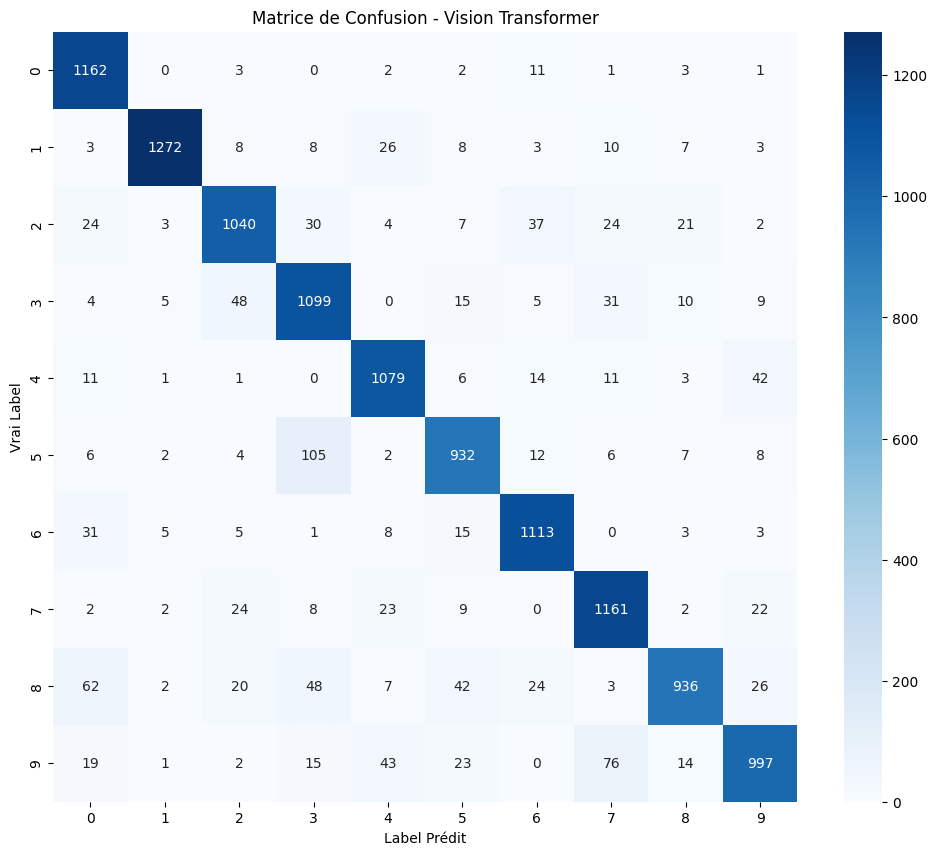

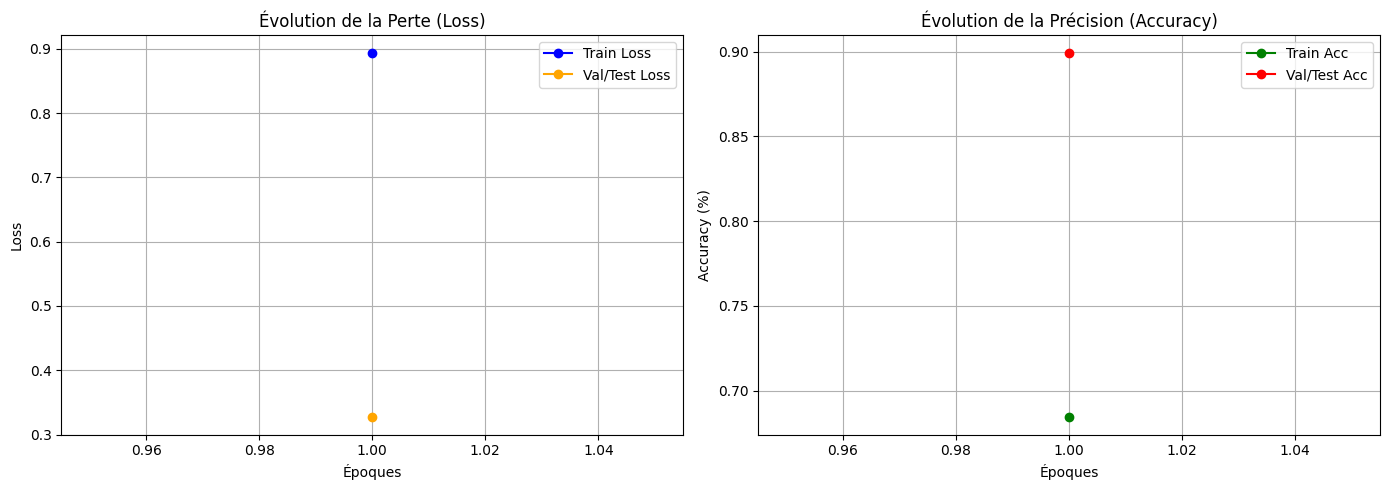

temps d'entrainement total
20.970970630645752


In [16]:
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import time
import numpy as np

# ============================================================
# CONFIGURATION
# ============================================================

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 64
EPOCHS = 1
LEARNING_RATE = 3e-4

# ============================================================
# PRÉPARATION DES DONNÉES
# ============================================================

# Reshape pour ViT
if x_train_torch_mnist.dim() == 2:
    x_train_torch_mnist = x_train_torch_mnist.view(-1, 1, 28, 28)
if x_test_torch_mnist.dim() == 2:
    x_test_torch_mnist = x_test_torch_mnist.view(-1, 1, 28, 28)

# DataLoaders
train_dataset = TensorDataset(x_train_torch_mnist, y_train_mnist)
val_dataset = TensorDataset(x_val_torch_mnist, y_val_mnist)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

classes = [str(i) for i in range(10)]
# ============================================================
# MODÈLE
# ============================================================

ViT_Mnist = ViT(
    img_size=28,
    patch_size=4,
    in_channels=1,
    n_classes=10,
    embed_dim=256,
    depth=4,
    n_heads=4,
    mlp_ratio=2.0
).to(DEVICE)

# ============================================================
# OPTIMISEUR ET LOSS
# ============================================================

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(ViT_Mnist.parameters(), lr=LEARNING_RATE)

# ============================================================
# ENTRAÎNEMENT
# ============================================================

print(f"Entraînement sur {DEVICE}")
print(f"Nombre d'images: {len(train_dataset)} train, {len(val_dataset)} validation\n")

# Sauvegarder l'historique
VitMnist_train_losses = []
VitMnist_val_losses = []
VitMnist_train_accs = []
VitMnist_val_accs = []
ViT_train_time_mnist_tot = 0

for epoch in range(EPOCHS):

    start_time = time.time()

    ViT_train_loss_mnist, ViT_train_acc_mnist, ViT_train_time_mnist = train_model(ViT_Mnist, train_loader, criterion,optimizer, DEVICE)
    ViT_v_loss_mnist, Vit_v_acc_mnist, _ = evaluate(ViT_Mnist, val_loader, criterion, DEVICE)

    # Sauvegarder l'historique
    VitMnist_train_losses.append(ViT_train_loss_mnist)
    VitMnist_train_accs.append(ViT_train_acc_mnist)

    VitMnist_val_losses.append(ViT_v_loss_mnist)
    VitMnist_val_accs.append(Vit_v_acc_mnist)

    epoch_time = time.time() - start_time
    ViT_train_time_mnist_tot = ViT_train_time_mnist_tot + epoch_time
    print("")
    print(f'Epoch: {epoch+1:02} | Time: {epoch_time:.0f}s')
    print(f'Train Loss: {ViT_train_loss_mnist:.3f} | Train Acc: {ViT_train_acc_mnist:.2f}%')

print("\nEntraînement terminé!")

# Afficher la matrice
cm = plot_confusion_matrix(ViT_Mnist, val_loader, classes, DEVICE)

plot_training_history(VitMnist_train_losses, VitMnist_val_losses, VitMnist_train_accs, VitMnist_val_accs)

print("temps d'entrainement total")
print(ViT_train_time_mnist_tot)

Test

Evaluation: 100%|██████████| 157/157 [01:03<00:00,  2.49it/s]



Test Loss: 0.599 |  Test Acc: 80.82%


Prédictions: 100%|██████████| 157/157 [01:19<00:00,  1.99it/s]


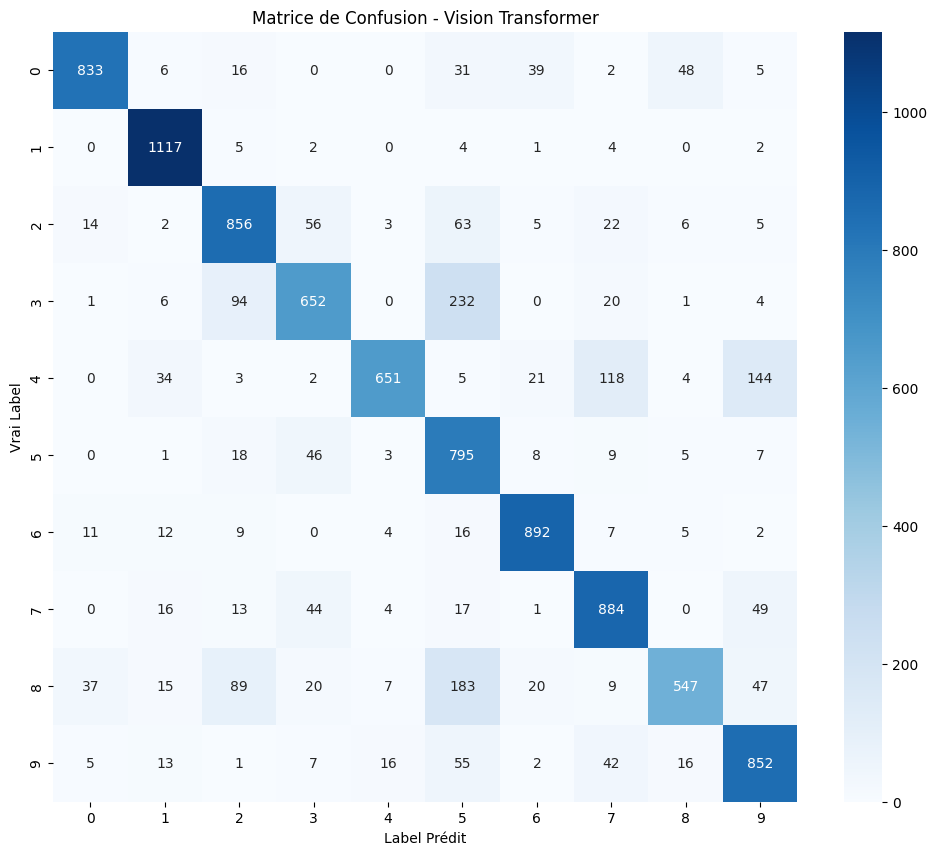

In [16]:
# ============================================================
#                          Test
#=============================================================

test_dataset_mnist = TensorDataset(x_test_torch_mnist, y_test_mnist)
test_loader_mnist = DataLoader(test_dataset_mnist, batch_size=BATCH_SIZE, shuffle=False)

ViT_test_loss_mnist, ViT_test_acc_mnist, ViT_test_time_mnist = evaluate(ViT_Mnist, test_loader_mnist, criterion, DEVICE)
print("")
print(f'Test Loss: {test_loss:.3f} |  Test Acc: {test_acc*100:.2f}%')

cm = plot_confusion_matrix(ViT_Mnist, test_loader_mnist, classes, DEVICE)

## Fmnist

Entraînement sur cpu
Nombre d'images: 48000 train, 12000 validation



Evaluation: 100%|██████████| 188/188 [01:00<00:00,  3.12it/s]



Epoch: 01 | Time: 1056s
	Train Loss: 0.823 | Train Acc: 69.17%


Evaluation: 100%|██████████| 188/188 [00:58<00:00,  3.21it/s]



Epoch: 02 | Time: 1038s
	Train Loss: 0.518 | Train Acc: 81.11%


Prédictions: 100%|██████████| 188/188 [00:59<00:00,  3.14it/s]


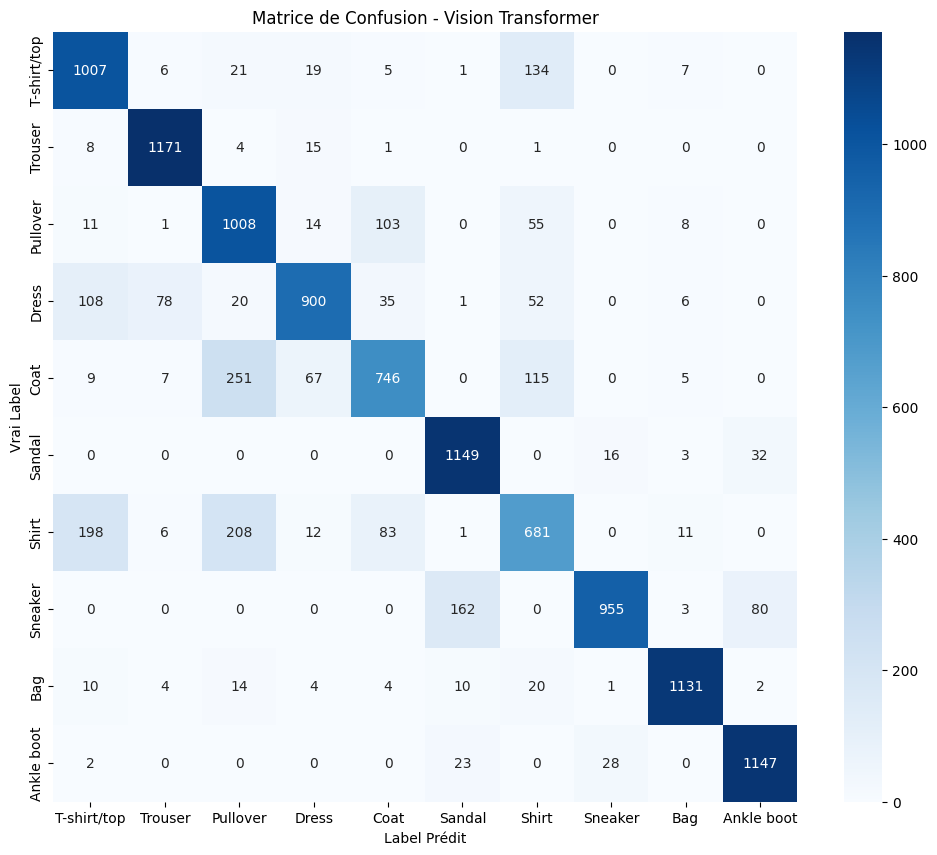

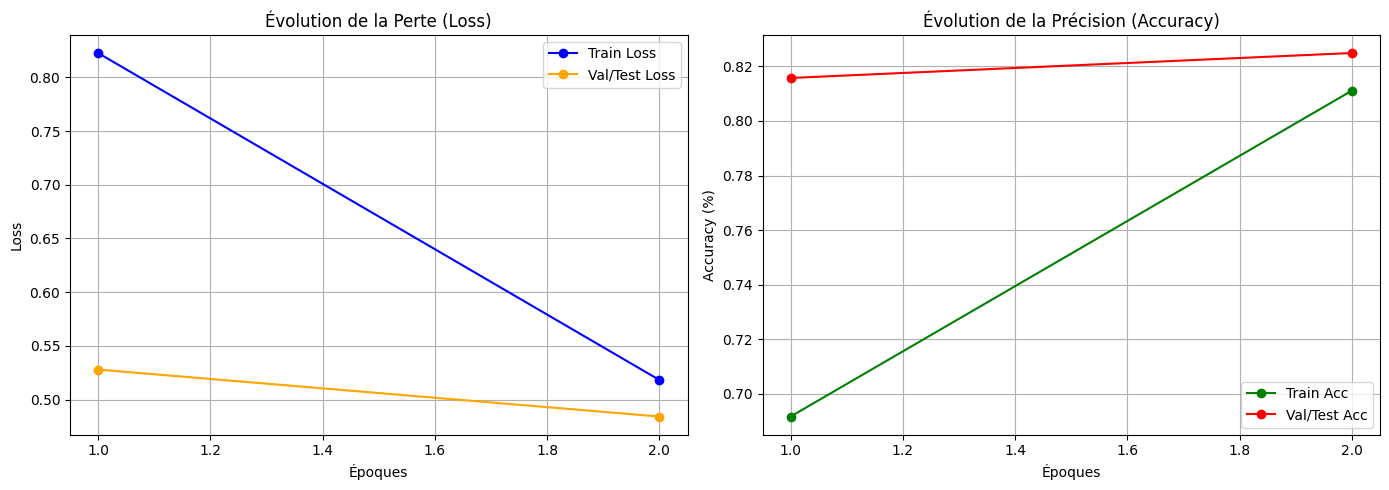

temps d'entrainement total
2093.5772523880005


In [42]:
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import time
import numpy as np


DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 64
EPOCHS = 2
LEARNING_RATE = 3e-4

# Reshape pour ViT
if x_train_torch_Fmnist.dim() == 2:
    x_train_torch_Fmnist = x_train_torch_Fmnist.view(-1, 1, 28, 28)
# x_test_torch_Fmnist is already (N, C, H, W), no reshape needed here if it's already processed by prepare_for_pytorch
# if x_test_torch_Fmnist.dim() == 2:
#     x_test_torch_Fmnist = x_test_torch_Fmnist.view(-1, 1, 28, 28)

# DataLoaders
train_dataset_Fmnist = TensorDataset(x_train_torch_Fmnist, y_train_Fmnist)
val_dataset_Fmnist = TensorDataset(x_val_torch_Fmnist, y_val_Fmnist) # Use x_val and y_val for validation

train_loader_Fmnist = DataLoader(train_dataset_Fmnist, batch_size=BATCH_SIZE, shuffle=True)
val_loader_Fmnist = DataLoader(val_dataset_Fmnist, batch_size=BATCH_SIZE, shuffle=False)

classes = ds_fmnist_train.classes

ViT_FMnist = ViT(
    img_size=28,
    patch_size=4,
    in_channels=1,
    n_classes=10,
    embed_dim=256,
    depth=4,
    n_heads=4,
    mlp_ratio=2.0
).to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(ViT_FMnist.parameters(), lr=LEARNING_RATE)

print(f"Entraînement sur {DEVICE}")
print(f"Nombre d'images: {len(train_dataset_Fmnist)} train, {len(val_dataset_Fmnist)} validation\n")

VitFmnist_train_losses = []
VitFmnist_val_losses = []
VitFmnist_train_accs = []
VitFmnist_val_accs = []
ViT_train_time_Fmnist_tot= 0

for epoch in range(EPOCHS):

    start_time = time.time()

    VIT_train_loss_Fmnist, VIT_train_acc_Fmnist, VIT_train_time_Fmnist = train_model(ViT_FMnist, train_loader_Fmnist, criterion,optimizer, DEVICE)
    VIT_v_loss_Fmnist, VIT_v_acc_Fmnist, _ = evaluate(ViT_FMnist, val_loader_Fmnist, criterion, DEVICE) # Pass val_loader_Fmnist here

    # Sauvegarder l'historique pour la suite
    VitFmnist_train_losses.append(VIT_train_loss_Fmnist)
    VitFmnist_train_accs.append(VIT_train_acc_Fmnist)

    VitFmnist_val_losses.append(VIT_v_loss_Fmnist)
    VitFmnist_val_accs.append(VIT_v_acc_Fmnist)

    epoch_time = time.time() - start_time
    ViT_train_time_Fmnist_tot = ViT_train_time_Fmnist_tot + epoch_time


    print("")
    print(f'Epoch: {epoch+1:02} | Time: {epoch_time:.0f}s')
    print(f'\tTrain Loss: {VIT_train_loss_Fmnist:.3f} | Train Acc: {VIT_train_acc_Fmnist*100:.2f}%')

# Afficher la matrice
cm = plot_confusion_matrix(ViT_FMnist, val_loader_Fmnist, classes, DEVICE)

plot_training_history(VitFmnist_train_losses, VitFmnist_val_losses, VitFmnist_train_accs, VitFmnist_val_accs)

print("temps d'entrainement total")
print(ViT_train_time_Fmnist_tot)


Evaluation: 100%|██████████| 157/157 [00:46<00:00,  3.37it/s]



Test Loss: 0.512 |  Test Acc: 80.92% |  Test Time: 46.60s


Prédictions: 100%|██████████| 157/157 [00:46<00:00,  3.41it/s]


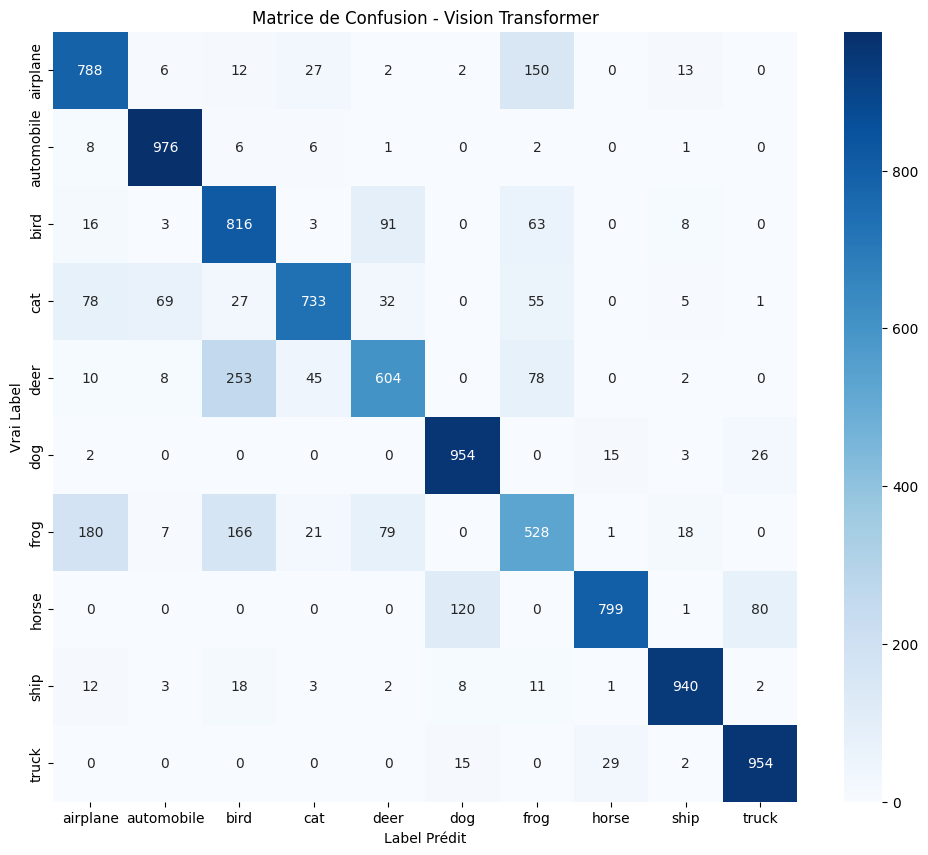

In [48]:

test_dataset_Fmnist = TensorDataset(x_test_torch_Fmnist, y_test_Fmnist)
test_loader_Fmnist = DataLoader(test_dataset_Fmnist, batch_size=BATCH_SIZE, shuffle=False)

Vit_test_loss_Fmnist, ViT_test_acc_Fmnist, Vit_test_time_Fmnist = evaluate(ViT_FMnist, test_loader_Fmnist, criterion, DEVICE)
print("")
print(f'Test Loss: {Vit_test_loss_Fmnist:.3f} |  Test Acc: {ViT_test_acc_Fmnist*100:.2f}% |  Test Time: {Vit_test_time_Fmnist:.2f}s')

cm = plot_confusion_matrix(ViT_FMnist, test_loader_Fmnist, classes, DEVICE)

## CIFAR10

### VITBASE CIFAR

In [ ]:
import torch
import torchvision
from torchvision.models import ViT_B_16_Weights

def get_pretrained_vit(num_classes=10):
    # 1. Charger le modèle avec les poids ImageNet
    weights = ViT_B_16_Weights.IMAGENET1K_V1
    model = torchvision.models.vit_b_16(weights=weights)

    # 2. Remplacer la tête (elle est dégelée par défaut)
    model.heads = torch.nn.Linear(in_features=768, out_features=num_classes)
    
    return model, weights.transforms()


In [14]:
model_vit, transform_vit = get_pretrained_vit(num_classes=10)

# On gèle d'abord tout le monde
for param in model_vit.parameters():
    param.requires_grad = False

# On dégèle uniquement ce qu'on veut entraîner
# 1. La tête de classification
for param in model_vit.heads.parameters():
    param.requires_grad = True

# 2. Les 2 derniers blocs de l'encodeur (comme votre exemple VGG)
for i, block in enumerate(model_vit.encoder.layers):
    if i >= 10: # Blocs 10 et 11
        for param in block.parameters():
            param.requires_grad = True
        print(f"Bloc {i} dégelé")

# Maintenant l'optimiseur ne verra que les paramètres avec requires_grad=True
optimizer = torch.optim.Adam(
    filter(lambda p: p.requires_grad, model_vit.parameters()), 
    lr=1e-5
)

Ancienne tête : Sequential(
  (head): Linear(in_features=768, out_features=1000, bias=True)
)
Bloc 10 dégelé
Bloc 11 dégelé


In [21]:
#Préparation des données pour le ViT finetuné
class ViTDataset(torch.utils.data.Dataset):
    def __init__(self, x_tensor, y_tensor, transform=None):
        self.x = x_tensor
        self.y = y_tensor
        self.transform = transform

    def __getitem__(self, index):
        x = self.x[index]
        if self.transform:
            x = self.transform(x)
        return x, self.y[index]

    def __len__(self):
        return len(self.x)

# Utilisation
num_classes = 10
BATCH_SIZE = 8 

vit_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=processor.image_mean, std=processor.image_std)
])

train_dataset = ViTDataset(x_train_torch_cifar10, y_train_cifar10, transform=vit_transforms)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True,num_workers=0)
test_dataset =ViTDataset(x_test_torch_cifar10, y_test_cifar10, transform=vit_transforms)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False,num_workers=0)


#### Finetune du modèle

In [22]:
torch.cuda.empty_cache()
import gc
gc.collect()

device = "cuda" if torch.cuda.is_available() else "cpu"
model_vit.to(device)


# Définir la perte
loss_fn = torch.nn.CrossEntropyLoss()

# Définir l'optimiseur (on n'optimise que les paramètres qui demandent un gradient)
optimizer = torch.optim.Adam(params=[p for p in model_vit.parameters() if p.requires_grad], 
                            lr=1e-3)

EPOCHS = 2
for epoch in range(EPOCHS):
    ViTBase_train_loss_Cifar, ViTBase_train_acc_Cifar, ViTBase_duration_Cifar = train_model(
        model_vit, 
        train_loader, 
        loss_fn, 
        optimizer, 
        device
    )
    
    print(f"Epoch: {epoch+1} | Loss: {ViTBase_train_loss_Cifar:.4f} | Acc: {ViTBase_train_acc_Cifar:.4f}")
    

Training:   0%|                                        | 0/5000 [11:29<?, ?it/s]


Epoch: 1 | Loss: 0.2098 | Acc: 0.9371


Training:   0%|                                        | 0/5000 [11:35<?, ?it/s]

Epoch: 2 | Loss: 0.1466 | Acc: 0.9538


#### Test sur le modèle

Evaluation: 100%|███████████████████████████| 1250/1250 [01:16<00:00, 16.25it/s]


--- Résultats du Fine-Tuning ViT ---
Test Loss : 0.193
Test Acc  : 94.03%
Durée     : 76.92s


Prédictions: 100%|██████████████████████████| 1250/1250 [01:17<00:00, 16.07it/s]


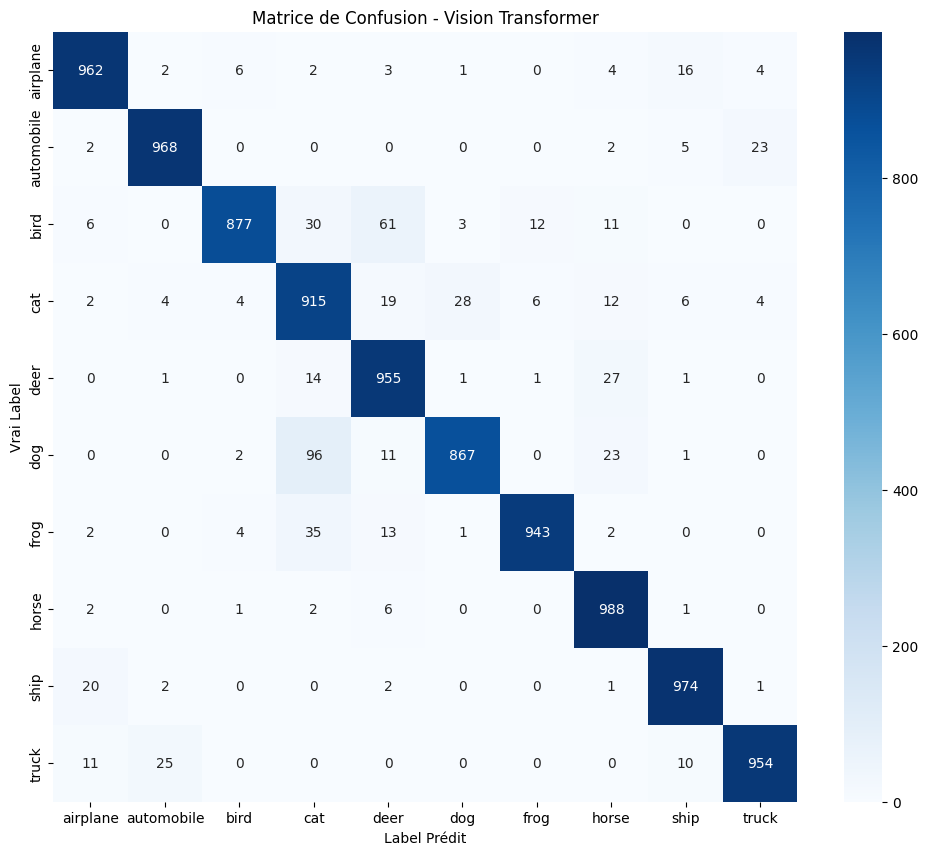

In [25]:
Vit_test_loss_cifar10, ViT_test_acc_cifar10, Vit_test_time_cifar10 = evaluate(
    model_vit, 
    test_loader, 
    loss_fn, 
    device
)

print(f"--- Résultats du Fine-Tuning ViT ---")
print(f"Test Loss : {Vit_test_loss_cifar10:.3f}")
print(f"Test Acc  : {ViT_test_acc_cifar10*100:.2f}%")
print(f"Durée     : {Vit_test_time_cifar10:.2f}s")

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
cm = plot_confusion_matrix(model_vit, test_loader, classes, device)

### Vit from Scratch 

Entraînement sur cuda
Nombre d'images: 40000 train, 10000 test



Evaluation: 100%|█████████████████████████████| 157/157 [00:01<00:00, 80.80it/s]



Epoch: 01 | Time: 25s
Train Loss: 1.765 | Train Acc: 0.33%


Evaluation: 100%|█████████████████████████████| 157/157 [00:01<00:00, 97.09it/s]



Epoch: 02 | Time: 23s
Train Loss: 1.423 | Train Acc: 0.48%


Evaluation: 100%|█████████████████████████████| 157/157 [00:01<00:00, 94.78it/s]



Epoch: 03 | Time: 22s
Train Loss: 1.277 | Train Acc: 0.54%


Evaluation: 100%|█████████████████████████████| 157/157 [00:01<00:00, 95.45it/s]



Epoch: 04 | Time: 22s
Train Loss: 1.196 | Train Acc: 0.57%


Evaluation: 100%|█████████████████████████████| 157/157 [00:01<00:00, 95.37it/s]



Epoch: 05 | Time: 22s
Train Loss: 1.138 | Train Acc: 0.59%


Evaluation: 100%|█████████████████████████████| 157/157 [00:01<00:00, 94.68it/s]



Epoch: 06 | Time: 23s
Train Loss: 1.079 | Train Acc: 0.61%


Evaluation: 100%|█████████████████████████████| 157/157 [00:01<00:00, 93.80it/s]



Epoch: 07 | Time: 23s
Train Loss: 1.040 | Train Acc: 0.63%


Evaluation: 100%|█████████████████████████████| 157/157 [00:01<00:00, 93.72it/s]



Epoch: 08 | Time: 23s
Train Loss: 0.998 | Train Acc: 0.64%


Evaluation: 100%|█████████████████████████████| 157/157 [00:01<00:00, 93.84it/s]



Epoch: 09 | Time: 23s
Train Loss: 0.963 | Train Acc: 0.66%


Evaluation: 100%|█████████████████████████████| 157/157 [00:01<00:00, 93.73it/s]



Epoch: 10 | Time: 23s
Train Loss: 0.925 | Train Acc: 0.67%


Evaluation: 100%|█████████████████████████████| 157/157 [00:01<00:00, 93.22it/s]



Epoch: 11 | Time: 23s
Train Loss: 0.888 | Train Acc: 0.68%


Evaluation: 100%|█████████████████████████████| 157/157 [00:01<00:00, 93.10it/s]



Epoch: 12 | Time: 23s
Train Loss: 0.859 | Train Acc: 0.69%


Evaluation: 100%|█████████████████████████████| 157/157 [00:01<00:00, 93.23it/s]



Epoch: 13 | Time: 23s
Train Loss: 0.818 | Train Acc: 0.70%


Evaluation: 100%|█████████████████████████████| 157/157 [00:01<00:00, 93.09it/s]



Epoch: 14 | Time: 23s
Train Loss: 0.782 | Train Acc: 0.72%


Evaluation: 100%|█████████████████████████████| 157/157 [00:01<00:00, 93.26it/s]



Epoch: 15 | Time: 23s
Train Loss: 0.747 | Train Acc: 0.73%


Evaluation: 100%|█████████████████████████████| 157/157 [00:01<00:00, 93.11it/s]



Epoch: 16 | Time: 23s
Train Loss: 0.711 | Train Acc: 0.74%


Evaluation: 100%|█████████████████████████████| 157/157 [00:01<00:00, 93.04it/s]



Epoch: 17 | Time: 23s
Train Loss: 0.681 | Train Acc: 0.75%


Evaluation: 100%|█████████████████████████████| 157/157 [00:01<00:00, 91.58it/s]



Epoch: 18 | Time: 23s
Train Loss: 0.644 | Train Acc: 0.77%


Evaluation: 100%|█████████████████████████████| 157/157 [00:01<00:00, 92.03it/s]



Epoch: 19 | Time: 23s
Train Loss: 0.608 | Train Acc: 0.78%


Evaluation: 100%|█████████████████████████████| 157/157 [00:01<00:00, 93.02it/s]



Epoch: 20 | Time: 23s
Train Loss: 0.569 | Train Acc: 0.80%

Entraînement terminé!


Prédictions: 100%|████████████████████████████| 157/157 [00:01<00:00, 89.60it/s]


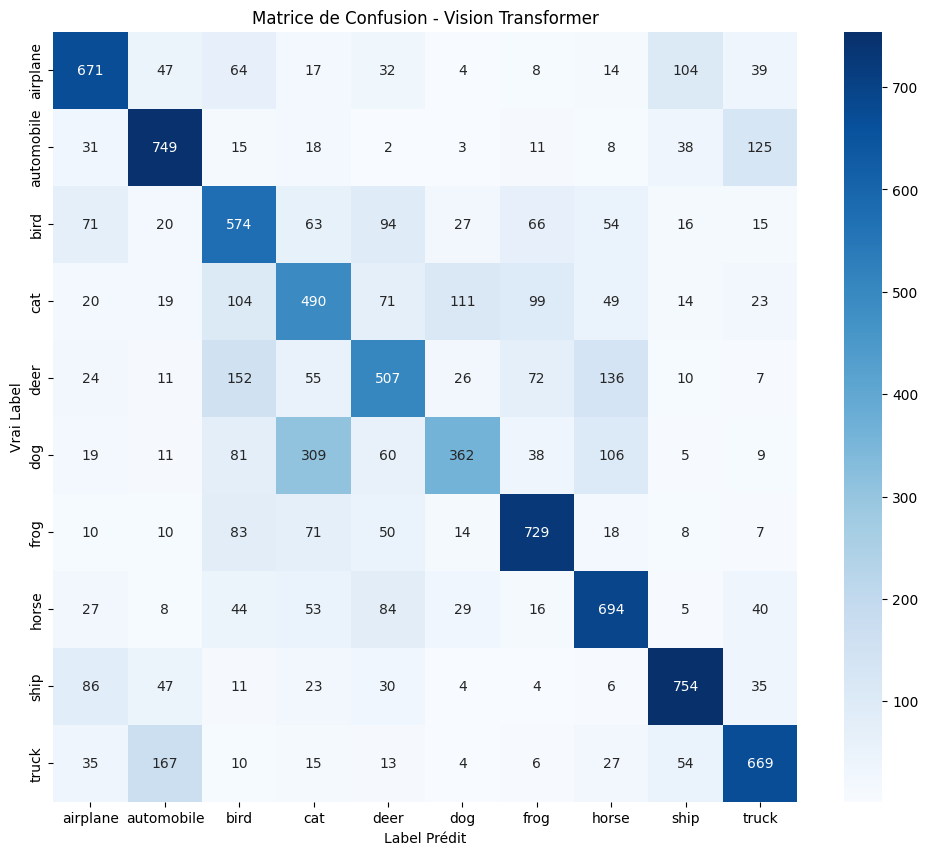

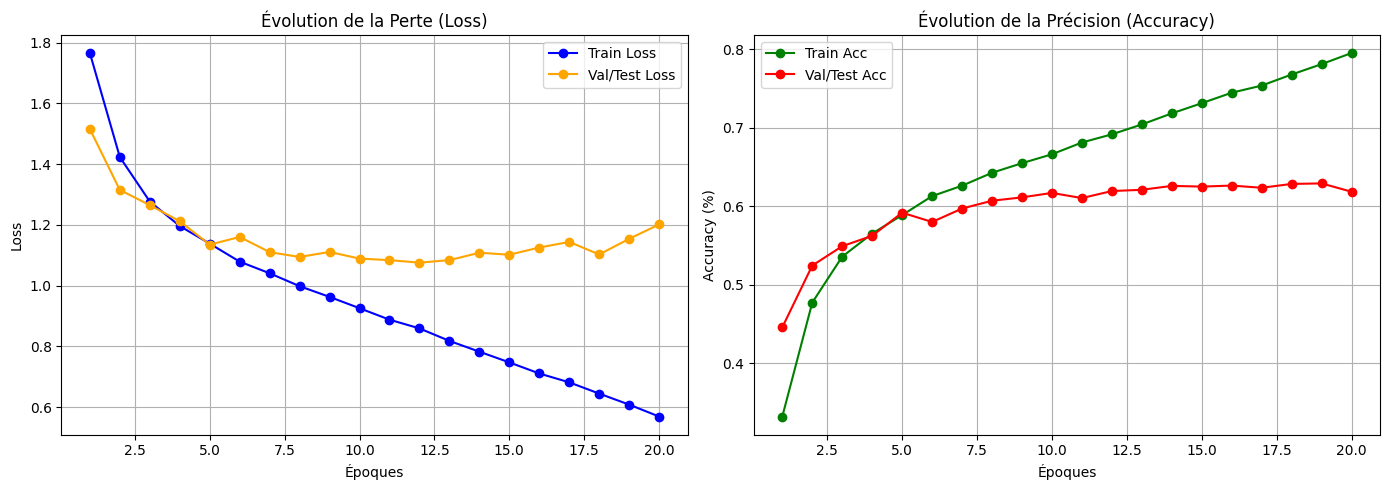

temps d'entrainement total
457.0061094760895


In [41]:
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import time
import numpy as np

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 64
EPOCHS = 20
LEARNING_RATE = 3e-4


# DataLoaders
train_dataset = TensorDataset(x_train_torch_cifar10, y_train_cifar10)
test_dataset = TensorDataset(x_test_torch_cifar10, y_test_cifar10)
classes = ds_cifar_train.classes
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# ============================================================
# MODÈLE
# ============================================================

ViT_Cifar10 = ViT(
    img_size=32,      # CHANGEMENT 1 : CIFAR fait 32x32 pixels
    patch_size=4,     # On découpe en carrés de 4x4
    in_channels=3,    # CHANGEMENT 2 : 3 canaux (Rouge, Vert, Bleu)
    n_classes=10,
    embed_dim=256,
    depth=6,          # J'ai augmenté un peu la profondeur car CIFAR est plus dur
    n_heads=8,        # Augmenté un peu pour capturer plus de détails
    mlp_ratio=2.0
).to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(ViT_Cifar10.parameters(), lr=LEARNING_RATE)

print(f"Entraînement sur {DEVICE}")
print(f"Nombre d'images: {len(train_dataset)} train, {len(test_dataset)} test\n")

# Sauvegarder l'historique
ViT_train_losses_CIFAR = []
ViT_train_accs_CIFAR = []
ViT_val_accs_CIFAR = []
ViT_val_losses_CIFAR = []
ViT_train_time_cifar10_tot= 0

for epoch in range(EPOCHS):

    start_time = time.time()


    ViT_train_loss_CIFAR, ViT_train_acc_CIFAR, ViT_train_time_CIFAR = train_model(ViT_Cifar10, train_loader, criterion,optimizer, DEVICE)
    ViT_v_loss_CIFAR, ViT_v_acc_CIFAR, _ = evaluate(ViT_Cifar10, test_loader, criterion, DEVICE)
    #Sauvegarde l'historique pour l'affichage et la comparaison finale des modèles
    ViT_train_losses_CIFAR.append(ViT_train_loss_CIFAR)
    ViT_train_accs_CIFAR.append(ViT_train_acc_CIFAR)

    ViT_val_losses_CIFAR.append(ViT_v_loss_CIFAR)
    ViT_val_accs_CIFAR.append(ViT_v_acc_CIFAR)

    epoch_time = time.time() - start_time
    ViT_train_time_cifar10_tot = ViT_train_time_cifar10_tot + epoch_time

    print("")
    print(f'Epoch: {epoch+1:02} | Time: {epoch_time:.0f}s')
    print(f'Train Loss: {ViT_train_loss_CIFAR:.3f} | Train Acc: {ViT_train_acc_CIFAR:.2f}%')

print("\nEntraînement terminé!")

cm = plot_confusion_matrix(ViT_Cifar10, test_loader, classes, DEVICE)

plot_training_history(ViT_train_losses_CIFAR, ViT_val_losses_CIFAR, ViT_train_accs_CIFAR, ViT_val_accs_CIFAR)

print("temps d'entrainement total")
print(ViT_train_time_cifar10_tot)


Evaluation sur l'échantillon de test

Evaluation: 100%|█████████████████████████████| 157/157 [00:01<00:00, 97.58it/s]



Test Loss: 1.201 |  Test Acc: 61.87% |  Test Time: 1.61s


Prédictions: 100%|████████████████████████████| 157/157 [00:01<00:00, 97.86it/s]


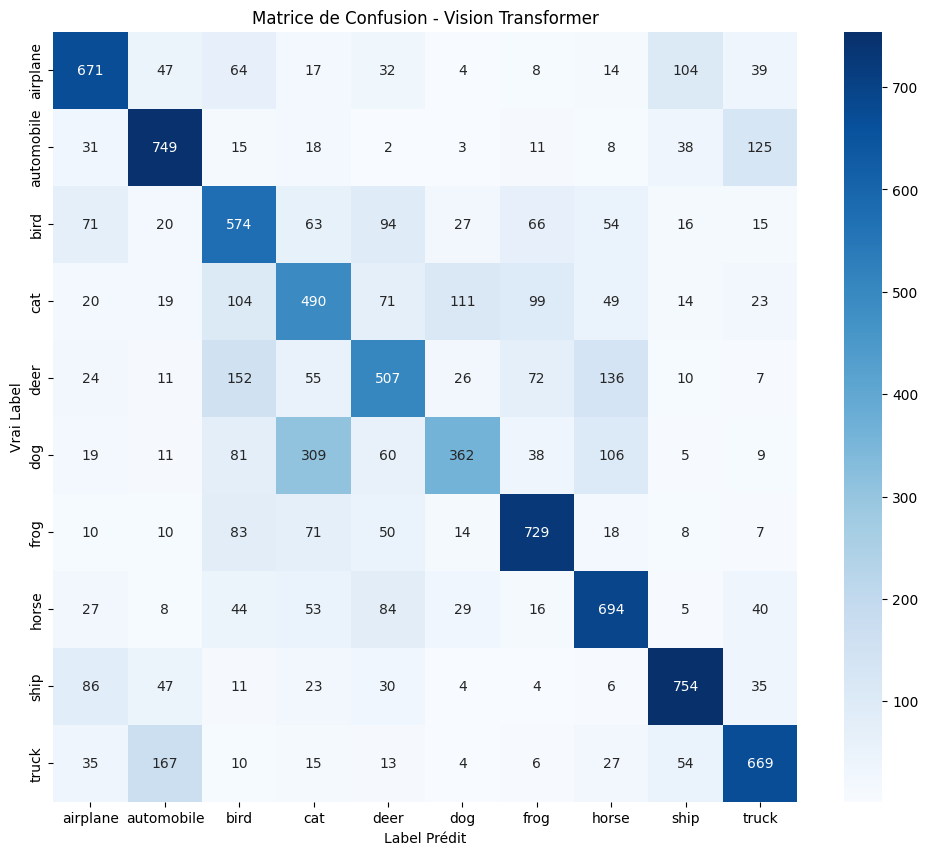

In [42]:

test_dataset_Cifar = TensorDataset(x_test_torch_cifar10, y_test_cifar10)
test_loader_Cifar = DataLoader(test_dataset_Cifar, batch_size=BATCH_SIZE, shuffle=False)

Vit_test_loss_cifar10, ViT_test_acc_cifar10, Vit_test_time_cifar10 = evaluate(ViT_Cifar10, test_loader_Cifar, criterion, DEVICE)
print("")
print(f'Test Loss: {Vit_test_loss_cifar10:.3f} |  Test Acc: {ViT_test_acc_cifar10*100:.2f}% |  Test Time: {Vit_test_time_cifar10:.2f}s')

cm = plot_confusion_matrix(ViT_Cifar10, test_loader_Cifar, classes, DEVICE)

# Comparaison des modèles

In [25]:
pip install thop

In [27]:
import torch
import time
import copy
import pandas as pd
from thop import profile

class BudgetAnalyzer:
    def __init__(self, device):
        self.device = device

    def get_flops_params(self, model, input_shape=(1, 3, 32, 32)):
        """ Calcule les FLOPs d'inférence et le nombre de paramètres """
        model_cpu = copy.deepcopy(model).cpu()
        model_cpu.eval()
        dummy_input = torch.randn(input_shape)
        try:
            # macs = Multiply-Accumulate. 1 MAC ≈ 2 FLOPs
            macs, params = profile(model_cpu, inputs=(dummy_input, ), verbose=False)
            flops_giga = (2 * macs) / 1e9
            params_million = params / 1e6
            return flops_giga, params_million
        except Exception as e:
            print(f"Erreur THOP: {e}")
            return 0, 0


    def measure_peak_memory(self, model, input_shape=(1, 3, 32, 32), mode='inference'):
        """ Mesure le pic de mémoire VRAM utilisé """
        if self.device.type != 'cuda': return 0

        torch.cuda.reset_peak_memory_stats()
        torch.cuda.empty_cache()

        model.to(self.device)
        dummy_input = torch.randn(input_shape).to(self.device)

        if mode == 'train':
            model.train()
            optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
            optimizer.zero_grad()
            loss = model(dummy_input).sum()
            loss.backward() # C'est là que la mémoire explose
            optimizer.step()
        else:
            model.eval()
            with torch.no_grad():
                _ = model(dummy_input)

        peak_bytes = torch.cuda.max_memory_allocated(self.device)
        return peak_bytes / (1024**2) # En MB

    def analyze_model(self, model, model_name, train_dataset_size, test_dataset_size, epochs, measured_train_time=None):
        """
        Génère le rapport complet.
        measured_train_time : Si vous avez mesuré le temps réel pendant votre boucle, passez-le ici.
                              Sinon, il sera estimé (moins précis).
        """
        results = {'Model': model_name}
        input_shape = (1, 3, 32, 32) # Une seule image
        batch_shape = (64, 3, 32, 32) # Pour simuler la mémoire batch

        print(f"Analyse de {model_name}...")

        # 1. FLOPs & Params
        flops, params = self.get_flops_params(model, input_shape)
        results['Params (M)'] = params
        results['Inference FLOPs (G)'] = flops
        # Estimation FLOPs Train: 3 * Inference * Nb_Images * Nb_Epoques
        results['Train FLOPs (P)'] = (3 * flops * train_dataset_size * epochs) / 1e6

        # 2. Mémoire (VRAM)
        results['Mem Test (MB)'] = self.measure_peak_memory(model, input_shape, mode='inference')
        # Pour le train, on mesure avec un batch de 64 (plus réaliste)
        results['Mem Train (MB)'] = self.measure_peak_memory(model, batch_shape, mode='train')

        # 3. Temps (Time)
        # Temps Test (Total pour tout le dataset de test)
        sec_per_img = self.measure_time(model, input_shape, mode='inference')
        results['Time Test Total (s)'] = sec_per_img * test_dataset_size

        # Temps Train (Total)
        if measured_train_time is not None:
            results['Time Train Total (min)'] = measured_train_time / 60
        else:
            # Estimation si non fourni (moins précis car ignore le chargement des données)
            sec_per_batch = self.measure_time(model, batch_shape, mode='train')
            batches_per_epoch = train_dataset_size / 64
            total_sec = sec_per_batch * batches_per_epoch * epochs
            results['Time Train Total (min)'] = total_sec / 60

        return results

In [30]:
def compare_models(models_dict, input_shapes_dict, accuracies_dict, train_times_dict, test_times_dict, device):
    """
    Compare plusieurs modèles sur différentes métriques
    """
    analyzer = BudgetAnalyzer(device)

    print("=" * 140)
    print("COMPARAISON DES MODÈLES")
    print("=" * 140)
    print()

    results = {}

    for model_name, model in models_dict.items():
        print(f"📊 Analyse de {model_name}...")

        # Récupère l'input shape spécifique au modèle
        input_shape = input_shapes_dict.get(model_name)
        if input_shape is None:
            print(f"  ⚠️ Aucune input_shape fournie pour {model_name}, utilisation par défaut (1, 3, 32, 32)")
            input_shape = (1, 3, 32, 32)
        else:
            print(f"  ℹ️ Input shape: {input_shape}")

        # Calcul des FLOPs et paramètres
        flops, params = analyzer.get_flops_params(model, input_shape)

        # Mémoire en inférence
        mem_inference = analyzer.measure_peak_memory(model, input_shape, mode='inference')

        # Mémoire en entraînement
        mem_train = analyzer.measure_peak_memory(model, input_shape, mode='train')

        # Récupérer l'accuracy
        test_acc = accuracies_dict.get(model_name, 0)
        if test_acc < 1:
            test_acc = test_acc * 100

        # Récupérer les temps
        train_time = train_times_dict.get(model_name, 0)
        test_time = test_times_dict.get(model_name, 0)

        results[model_name] = {
            'input_shape': input_shape,
            'test_accuracy': test_acc,
            'flops_giga': flops,
            'params_million': params,
            'memory_inference_mb': mem_inference,
            'memory_train_mb': mem_train,
            'train_time_s': train_time,
            'test_time_s': test_time
        }

        print(f"  ✓ Test Accuracy: {test_acc:.2f}%")
        print(f"  ✓ FLOPs: {flops:.2f} GFLOPs")
        print(f"  ✓ Paramètres: {params:.2f} M")
        print(f"  ✓ Mémoire (inférence): {mem_inference:.2f} MB")
        print(f"  ✓ Mémoire (entraînement): {mem_train:.2f} MB")
        print(f"  ✓ Temps d'entraînement: {train_time:.2f}s")
        print(f"  ✓ Temps de test: {test_time:.2f}s")
        print()

    # Tableau récapitulatif
    print("=" * 140)
    print("TABLEAU RÉCAPITULATIF")
    print("=" * 140)
    print(f"{'Modèle':<20} {'Input Shape':<18} {'Acc (%)':<12} {'FLOPs (G)':<12} {'Params (M)':<12} "
          f"{'Mem Inf (MB)':<15} {'Mem Train (MB)':<15} {'Train Time (s)':<15} {'Test Time (s)':<15}")
    print("-" * 140)

    for model_name, metrics in results.items():
        shape_str = str(metrics['input_shape'])
        print(f"{model_name:<20} {shape_str:<18} {metrics['test_accuracy']:<12.2f} {metrics['flops_giga']:<12.2f} "
              f"{metrics['params_million']:<12.2f} {metrics['memory_inference_mb']:<15.2f} "
              f"{metrics['memory_train_mb']:<15.2f} {metrics['train_time_s']:<15.2f} {metrics['test_time_s']:<15.2f}")

    print("=" * 140)

    return results




In [50]:
# Exemple d'utilisation avec tes modèles
models_to_compare = {
    'ViT_MNIST': ViT_Mnist,
    'ViT_FashionMNIST': ViT_FMnist,
    'ViT_CIFAR10': ViT_Cifar10
}

input_shapes = {
    'ViT_MNIST': (1, 1, 28, 28),
    'ViT_FashionMNIST': (1, 1, 28, 28),
    'ViT_CIFAR10': (1, 3, 32, 32)
}

# Tes accuracies de test
accuracies = {
    'ViT_MNIST': ViT_test_acc_mnist,
    'ViT_FashionMNIST': ViT_test_acc_Fmnist,
    'ViT_CIFAR10': ViT_test_acc_cifar10
}

# Tes temps d'entraînement (total sur toutes les epochs)
train_times = {
    'ViT_MNIST': ViT_train_time_mnist,
    'ViT_FashionMNIST': VIT_train_time_Fmnist,
    'ViT_CIFAR10': ViT_train_time_CIFAR
}

# Tes temps de test
test_times = {
    'ViT_MNIST': ViT_test_time_mnist,
    'ViT_FashionMNIST': Vit_test_time_Fmnist,
    'ViT_CIFAR10': Vit_test_time_cifar10
}

results = compare_models(models_to_compare, input_shapes, accuracies, train_times, test_times, DEVICE)

COMPARAISON DES MODÈLES

📊 Analyse de ViT_MNIST...
  ℹ️ Input shape: (1, 1, 28, 28)
Erreur THOP: 'NoneType' object has no attribute 'detach'
  ✓ Test Accuracy: 80.82%
  ✓ FLOPs: 0.00 GFLOPs
  ✓ Paramètres: 0.00 M
  ✓ Mémoire (inférence): 0.00 MB
  ✓ Mémoire (entraînement): 0.00 MB
  ✓ Temps d'entraînement: 960.37s
  ✓ Temps de test: 63.08s

📊 Analyse de ViT_FashionMNIST...
  ℹ️ Input shape: (1, 1, 28, 28)
  ✓ Test Accuracy: 80.92%
  ✓ FLOPs: 0.11 GFLOPs
  ✓ Paramètres: 1.06 M
  ✓ Mémoire (inférence): 0.00 MB
  ✓ Mémoire (entraînement): 0.00 MB
  ✓ Temps d'entraînement: 979.01s
  ✓ Temps de test: 46.60s

📊 Analyse de ViT_CIFAR10...
  ℹ️ Input shape: (1, 3, 32, 32)
  ✓ Test Accuracy: 52.25%
  ✓ FLOPs: 0.21 GFLOPs
  ✓ Paramètres: 1.60 M
  ✓ Mémoire (inférence): 0.00 MB
  ✓ Mémoire (entraînement): 0.00 MB
  ✓ Temps d'entraînement: 1625.48s
  ✓ Temps de test: 96.62s

TABLEAU RÉCAPITULATIF
Modèle               Input Shape        Acc (%)      FLOPs (G)    Params (M)   Mem Inf (MB)    Mem Trai

## Interprétabilité ViT

In [38]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

class ViTInterpreter:
    def __init__(self, model, device):
        self.model = model
        self.device = device
        self.attention_maps = []

    def hook_attention(self):
        """Enregistre les attention maps de chaque couche"""
        self.attention_maps = []
        hooks = []

        def get_attention(module, input, output):
            # Pour nn.MultiheadAttention, on doit capturer avec need_weights=True
            # On va modifier temporairement le comportement
            pass

        # Pour ton architecture, on doit intercepter différemment
        # On va patcher les blocs transformer
        original_forwards = []

        for block in self.model.blocks:
            original_forward = block.forward
            original_forwards.append(original_forward)

            def make_new_forward(orig_forward, attn_module):
                def new_forward(x):
                    residual = x
                    x = block.norm1(x)
                    # Force need_weights=True pour capturer l'attention
                    x, attn_weights = attn_module(x, x, x, need_weights=True, average_attn_weights=False)
                    self.attention_maps.append(attn_weights.detach().cpu())
                    x = residual + x

                    residual = x
                    x = block.norm2(x)
                    x = block.mlp(x)
                    x = residual + x
                    return x
                return new_forward

            block.forward = make_new_forward(original_forward, block.attn)

        return original_forwards

    def restore_forwards(self, original_forwards):
        """Restaure les forward originaux"""
        for block, orig_forward in zip(self.model.blocks, original_forwards):
            block.forward = orig_forward

    def visualize_attention(self, image, class_names=None, layer_idx=-1, head_idx=0):
        """
        Visualise l'attention du modèle

        Args:
            image: Image tensor (1, C, H, W) ou (C, H, W)
            class_names: Liste des noms de classes
            layer_idx: Quelle couche visualiser (-1 = dernière)
            head_idx: Quelle tête d'attention visualiser
        """
        self.model.eval()

        # Prépare l'image
        if image.dim() == 3:
            image = image.unsqueeze(0)
        image = image.to(self.device)

        # Enregistre les attentions
        original_forwards = self.hook_attention()

        # Forward pass
        with torch.no_grad():
            output = self.model(image)
            pred_class = output.argmax(dim=1).item()
            confidence = F.softmax(output, dim=1)[0, pred_class].item()

        # Restaure les forwards originaux
        self.restore_forwards(original_forwards)

        # Récupère l'attention de la couche sélectionnée
        if len(self.attention_maps) == 0:
            print("❌ Aucune attention map capturée. Vérifie l'architecture du modèle.")
            return

        attn = self.attention_maps[layer_idx]  # (batch, n_heads, n_patches+1, n_patches+1)
        attn = attn[0, head_idx]  # Sélectionne la tête (n_patches+1, n_patches+1)

        # L'attention du token CLS vers les patches
        attn_cls = attn[0, 1:]  # Ignore le CLS token lui-même (n_patches,)

        # Reshape en grille 2D
        n_patches = int(np.sqrt(attn_cls.shape[0]))
        attn_map = attn_cls.reshape(n_patches, n_patches).numpy()

        # Visualisation
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        # Image originale
        img_display = image[0].cpu().permute(1, 2, 0).numpy()
        if img_display.shape[2] == 1:
            img_display = img_display.squeeze()
            axes[0].imshow(img_display, cmap='gray')
        else:
            # Normalise pour affichage si nécessaire
            img_display = (img_display - img_display.min()) / (img_display.max() - img_display.min())
            axes[0].imshow(img_display)
        axes[0].set_title('Image originale')
        axes[0].axis('off')

        # Attention map
        im = axes[1].imshow(attn_map, cmap='hot', interpolation='nearest')
        axes[1].set_title(f'Attention Map\nCouche {layer_idx}, Tête {head_idx}')
        axes[1].axis('off')
        plt.colorbar(im, ax=axes[1])

        # Superposition
        attn_resized = F.interpolate(
            torch.from_numpy(attn_map).unsqueeze(0).unsqueeze(0),
            size=(image.shape[2], image.shape[3]),
            mode='bilinear',
            align_corners=False
        )[0, 0].numpy()

        if img_display.ndim == 2:
            axes[2].imshow(img_display, cmap='gray')
        else:
            axes[2].imshow(img_display)
        axes[2].imshow(attn_resized, cmap='hot', alpha=0.5)

        pred_label = class_names[pred_class] if class_names else f"Classe {pred_class}"
        axes[2].set_title(f'Superposition\nPrédiction: {pred_label}\nConfiance: {confidence:.1%}')
        axes[2].axis('off')

        plt.tight_layout()
        plt.show()

        return attn_map

    def visualize_all_heads(self, image, class_names=None, layer_idx=-1):
        """Visualise toutes les têtes d'attention d'une couche"""
        self.model.eval()

        if image.dim() == 3:
            image = image.unsqueeze(0)
        image = image.to(self.device)

        original_forwards = self.hook_attention()

        with torch.no_grad():
            output = self.model(image)
            pred_class = output.argmax(dim=1).item()
            confidence = F.softmax(output, dim=1)[0, pred_class].item()

        self.restore_forwards(original_forwards)

        if len(self.attention_maps) == 0:
            print("❌ Aucune attention map capturée.")
            return

        attn = self.attention_maps[layer_idx][0]  # (n_heads, n_patches+1, n_patches+1)
        n_heads = attn.shape[0]
        n_patches = int(np.sqrt(attn.shape[1] - 1))

        # Calcule la grille
        cols = min(4, n_heads)
        rows = (n_heads + cols - 1) // cols

        fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))
        if rows == 1:
            axes = axes.reshape(1, -1)
        axes = axes.flatten()

        for head_idx in range(n_heads):
            attn_head = attn[head_idx, 0, 1:]  # CLS vers patches
            attn_map = attn_head.reshape(n_patches, n_patches).numpy()

            im = axes[head_idx].imshow(attn_map, cmap='hot', interpolation='nearest')
            axes[head_idx].set_title(f'Tête {head_idx}')
            axes[head_idx].axis('off')
            plt.colorbar(im, ax=axes[head_idx], fraction=0.046, pad=0.04)

        # Cache les axes vides
        for idx in range(n_heads, len(axes)):
            axes[idx].axis('off')

        pred_label = class_names[pred_class] if class_names else f"Classe {pred_class}"
        fig.suptitle(f'Toutes les têtes - Couche {layer_idx}\nPrédiction: {pred_label} (Confiance: {confidence:.1%})',
                     fontsize=16, y=0.98)
        plt.tight_layout()
        plt.show()


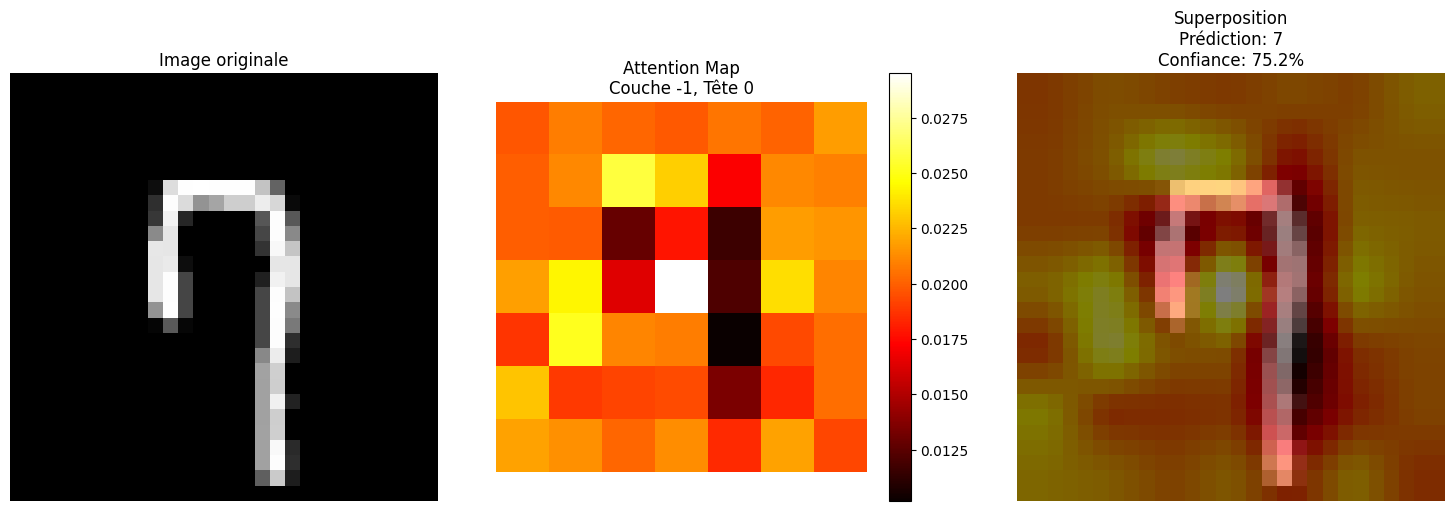

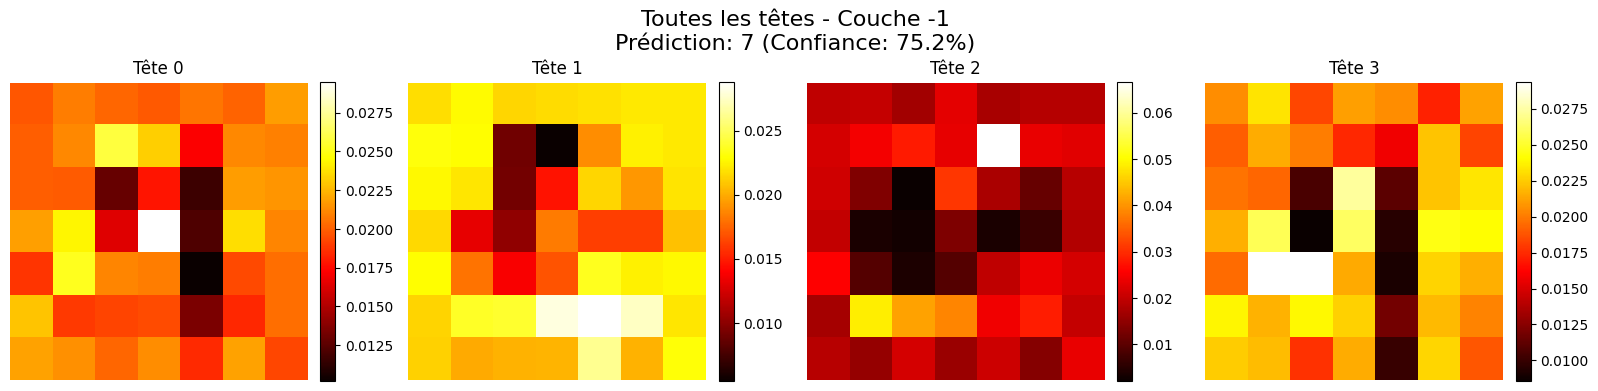

In [41]:
interpreter = ViTInterpreter(ViT_Mnist, DEVICE)
test_image, test_label = next(iter(val_loader))
test_image = test_image[0]
#
# # Visualise l'attention d'une tête spécifique
interpreter.visualize_attention(test_image, class_names=[str(i) for i in range(10)], layer_idx=-1, head_idx=0)
#
# # Visualise toutes les têtes de la dernière couche
interpreter.visualize_all_heads(test_image, class_names=[str(i) for i in range(10)], layer_idx=-1)



Le code montre l'attention map pour toutes les têtes, on voit que plus la couleur est clair plus il accorde de l'importance. En superposant les têtes on voit bien que le modèle suit le tracé du chiffre 7.

On a donc que le modèle prend bien sa décision en se basant sur le chiffre 7.

